## IMPORT PACKAGE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score, auc

import warnings
warnings.filterwarnings('ignore')

## Read Data form CSV File

In [2]:
raw_data=pd.read_csv('loan_data.csv')
df=raw_data.copy(deep=True)
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# EDA

In [3]:
df.columns=df.columns.str.replace('.','_')
df.head(2)

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int_rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log_annual_inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days_with_cr_line  9578 non-null   float64
 8   revol_bal          9578 non-null   int64  
 9   revol_util         9578 non-null   float64
 10  inq_last_6mths     9578 non-null   int64  
 11  delinq_2yrs        9578 non-null   int64  
 12  pub_rec            9578 non-null   int64  
 13  not_fully_paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
df.isna().sum()

credit_policy        0
purpose              0
int_rate             0
installment          0
log_annual_inc       0
dti                  0
fico                 0
days_with_cr_line    0
revol_bal            0
revol_util           0
inq_last_6mths       0
delinq_2yrs          0
pub_rec              0
not_fully_paid       0
dtype: int64

In [6]:
df.describe()

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [7]:
print('Not Fully Paid')
print(df["not_fully_paid"].value_counts())
print(f'\nCridet Policy')
print(df["credit_policy"].value_counts())
print(f'\nPurpose')
print(df["purpose"].value_counts())

Not Fully Paid
0    8045
1    1533
Name: not_fully_paid, dtype: int64

Cridet Policy
1    7710
0    1868
Name: credit_policy, dtype: int64

Purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64


## Data Visualization

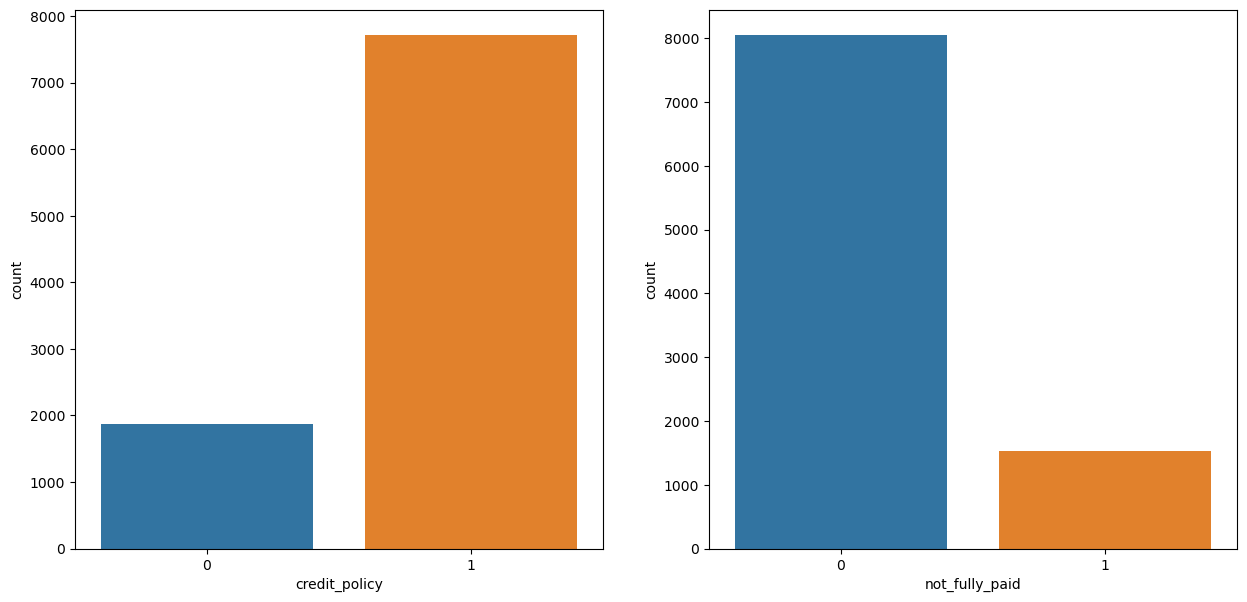

In [8]:
fig,axes=plt.subplots(1,2,figsize=(15,7))
sns.countplot(ax=axes[0],data=df,x='credit_policy')
sns.countplot(ax=axes[1],data=df,x='not_fully_paid')
plt.show();

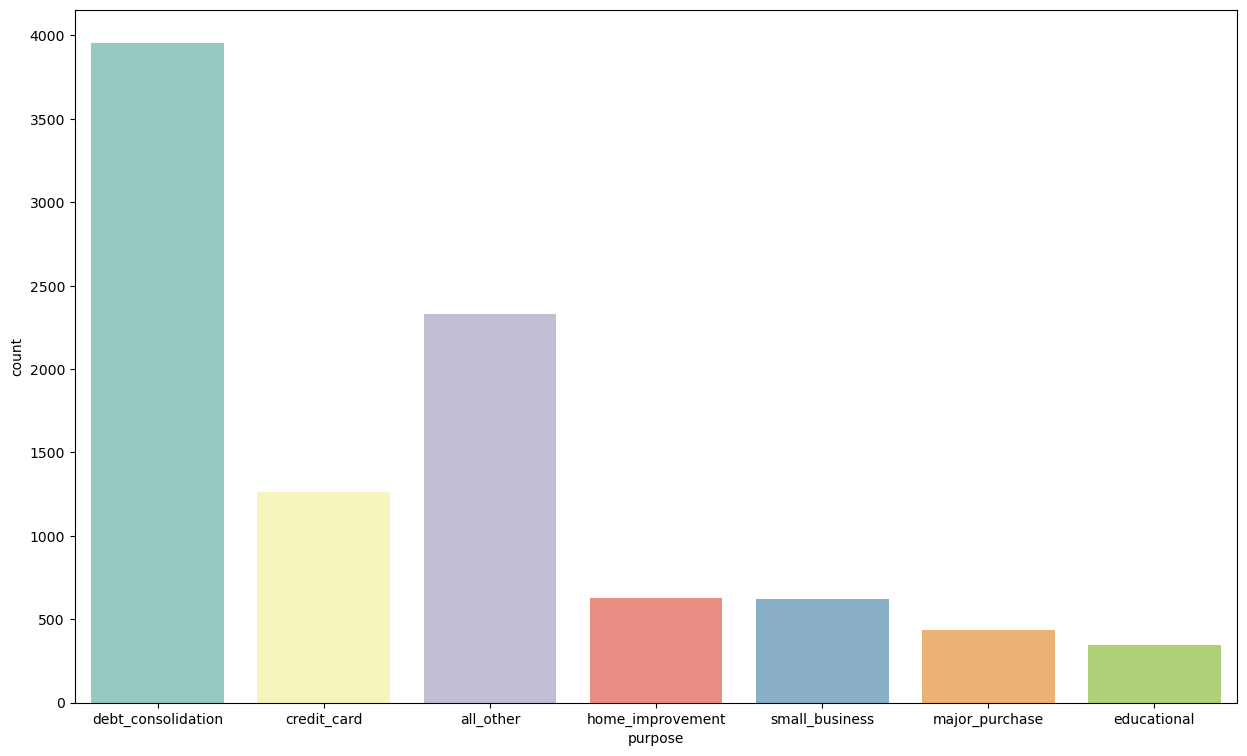

In [9]:
plt.figure(figsize=(15,9))
sns.countplot(data=df,x='purpose',palette='Set3')
plt.show();

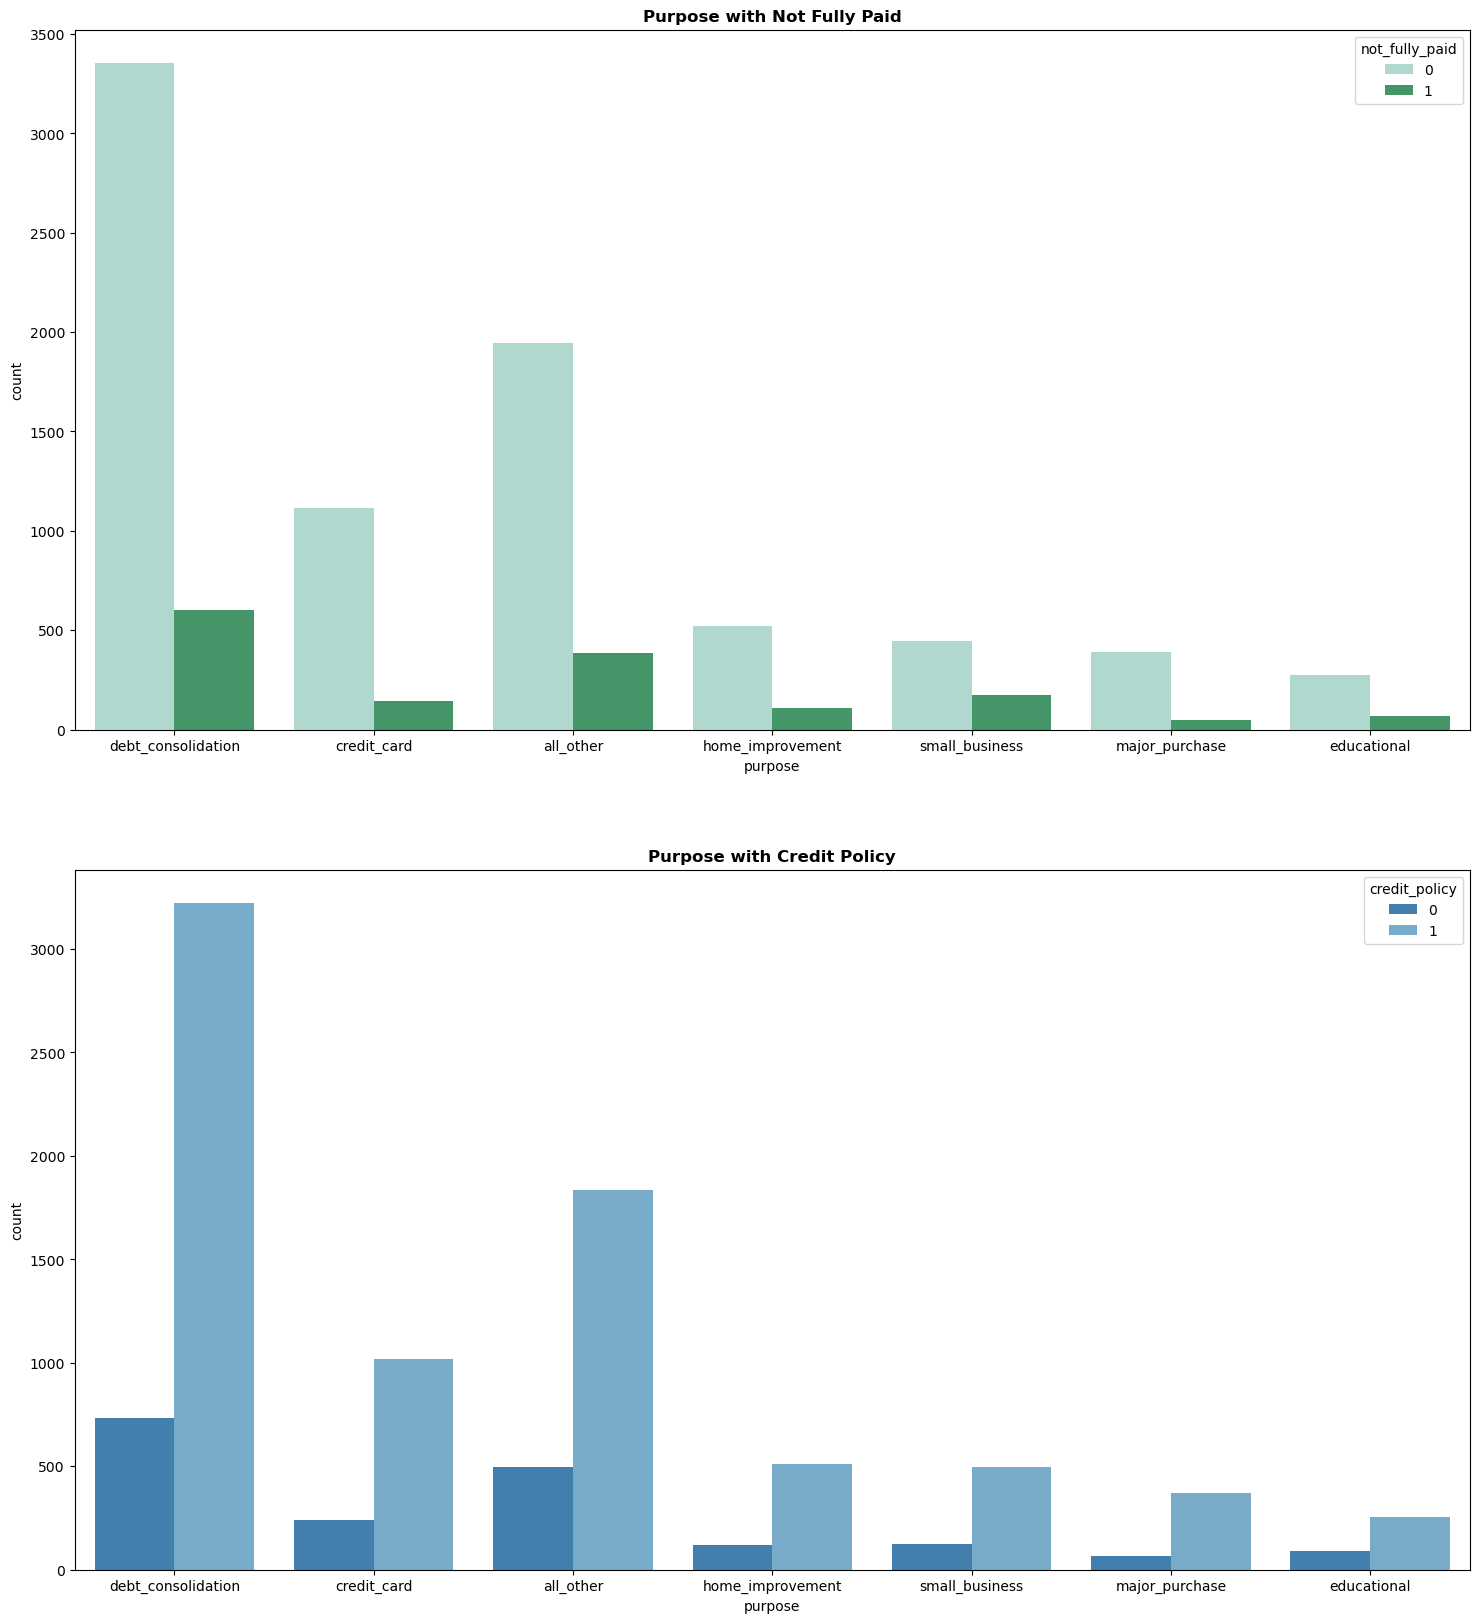

In [10]:
fig, axes=plt.subplots(2,1,figsize=(18,20))
sns.countplot(ax=axes[0],data=df,x='purpose',hue='not_fully_paid',palette='BuGn')
axes[0].set_title('Purpose with Not Fully Paid',fontweight='bold')
print('\n')
sns.countplot(ax=axes[1],data=df,x='purpose',hue='credit_policy',palette='tab20c')
axes[1].set_title('Purpose with Credit Policy',fontweight='bold')

plt.show();

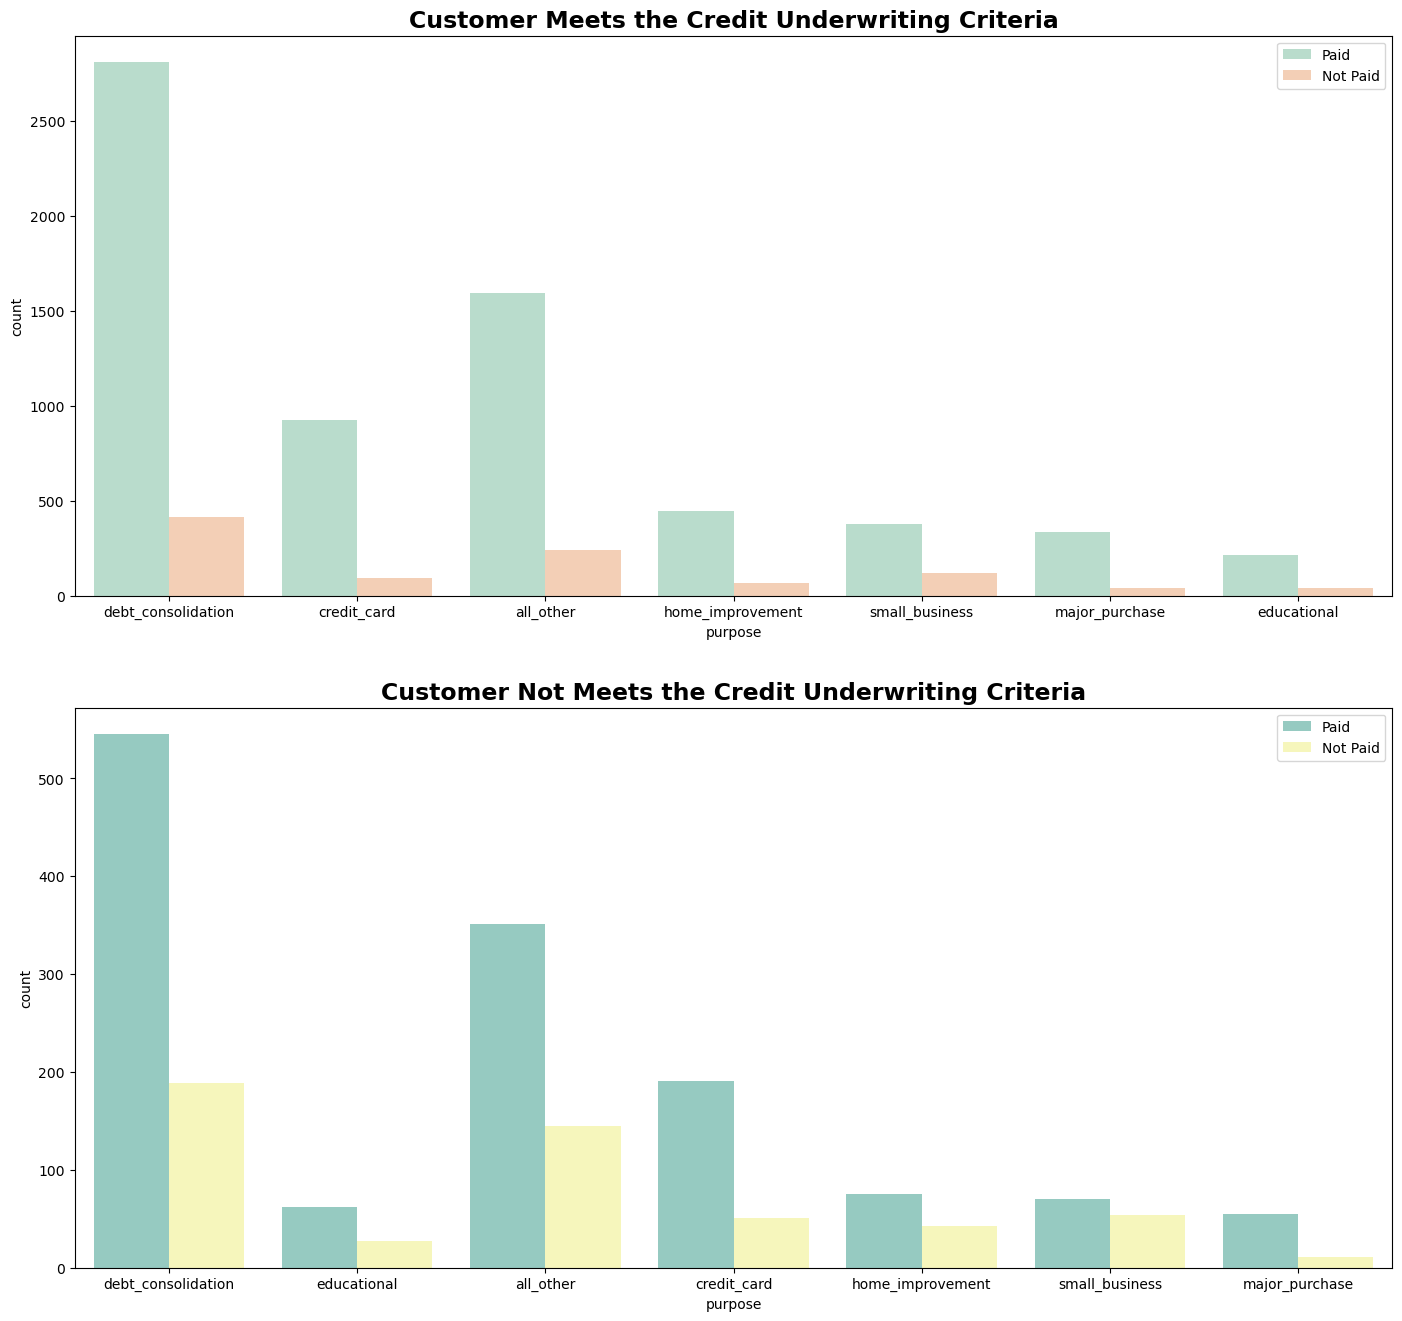

In [11]:
fig,axes=plt.subplots(2,1,figsize=(17,16))
sns.countplot(ax=axes[0],data=df[df['credit_policy']==1],x='purpose',hue='not_fully_paid',palette='Pastel2')
axes[0].legend(['Paid','Not Paid'])
axes[0].set_title('Customer Meets the Credit Underwriting Criteria',fontweight='bold',size=17)
print('\n')
sns.countplot(ax=axes[1],data=df[df['credit_policy']==0],x='purpose',hue='not_fully_paid',palette='Set3')
axes[1].legend(['Paid','Not Paid'])
axes[1].set_title('Customer Not Meets the Credit Underwriting Criteria',fontweight='bold',size=17)

plt.show();

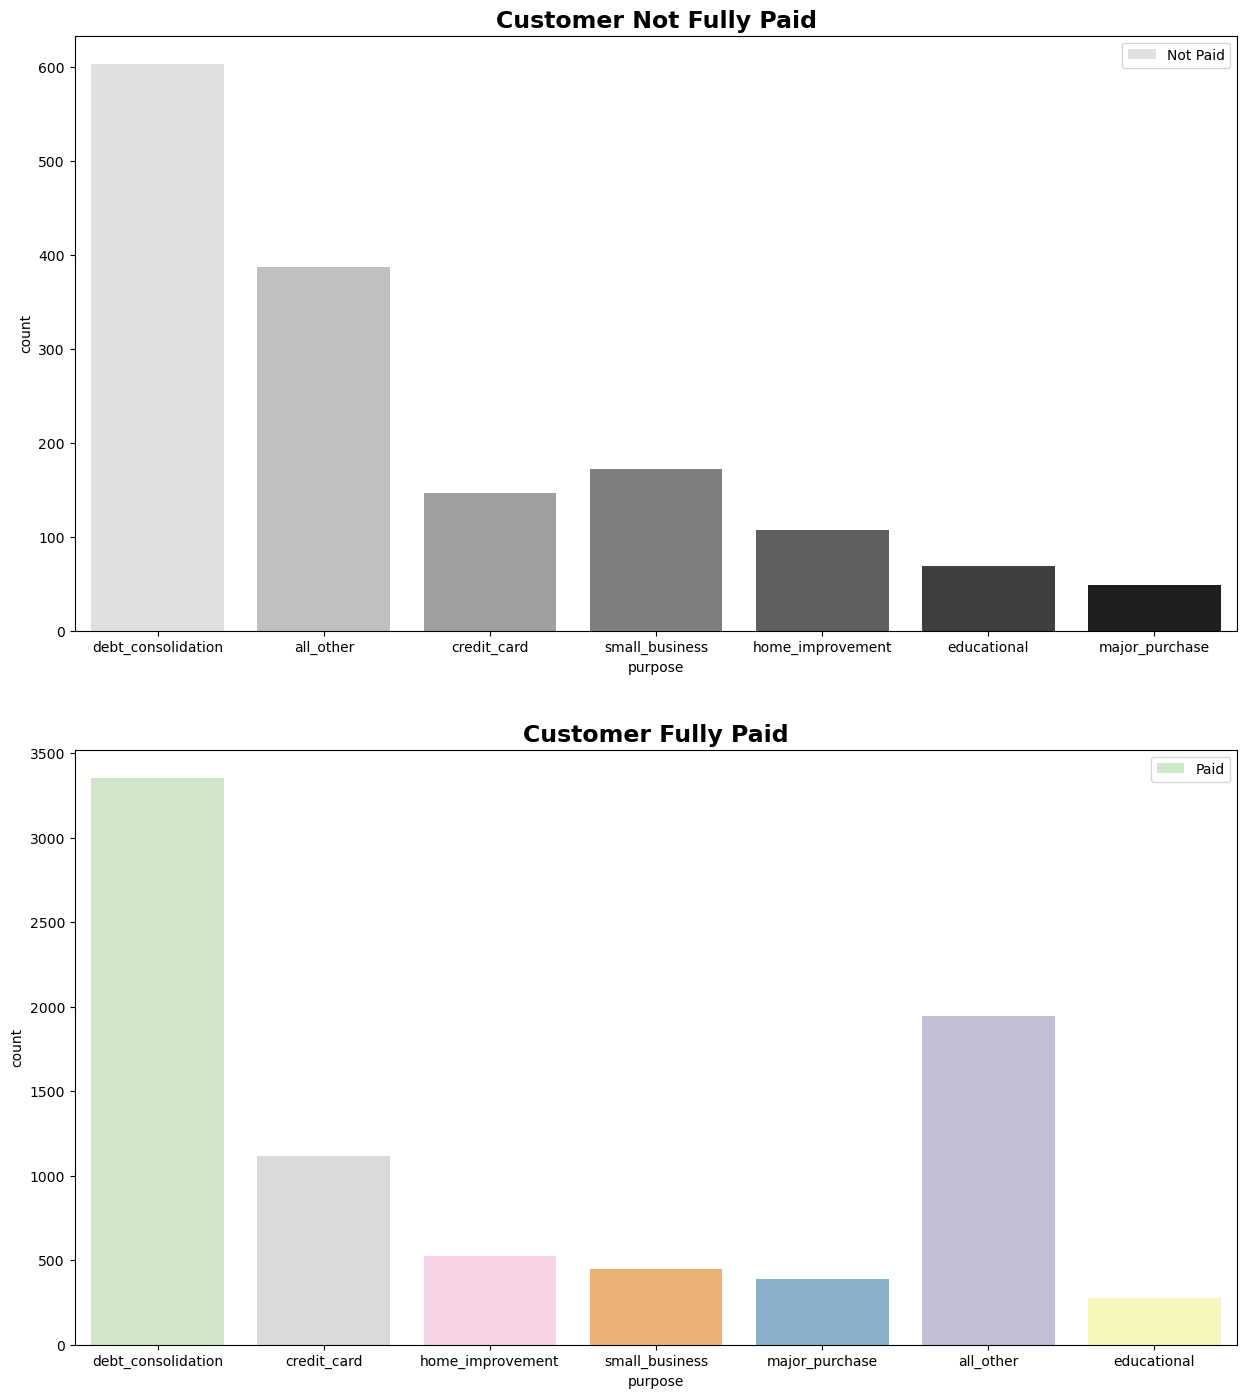

In [12]:
fig,axes=plt.subplots(2,1,figsize=(15,17))
sns.countplot(ax=axes[0],data=df[df['not_fully_paid']==1],x='purpose',palette='gray_r')
axes[0].legend(['Not Paid'])
axes[0].set_title('Customer Not Fully Paid',fontweight='bold',size=17)
print('\n')
sns.countplot(ax=axes[1],data=df[df['not_fully_paid']==0],x='purpose',palette='Set3_r')
axes[1].legend(['Paid'])
axes[1].set_title('Customer Fully Paid',fontweight='bold',size=17)

plt.show();

In [13]:
num_col=['credit_policy', 'int_rate', 'installment', 'log_annual_inc', 'dti',
       'fico', 'days_with_cr_line', 'revol_bal', 'revol_util',
       'inq_last_6mths', 'delinq_2yrs', 'pub_rec']

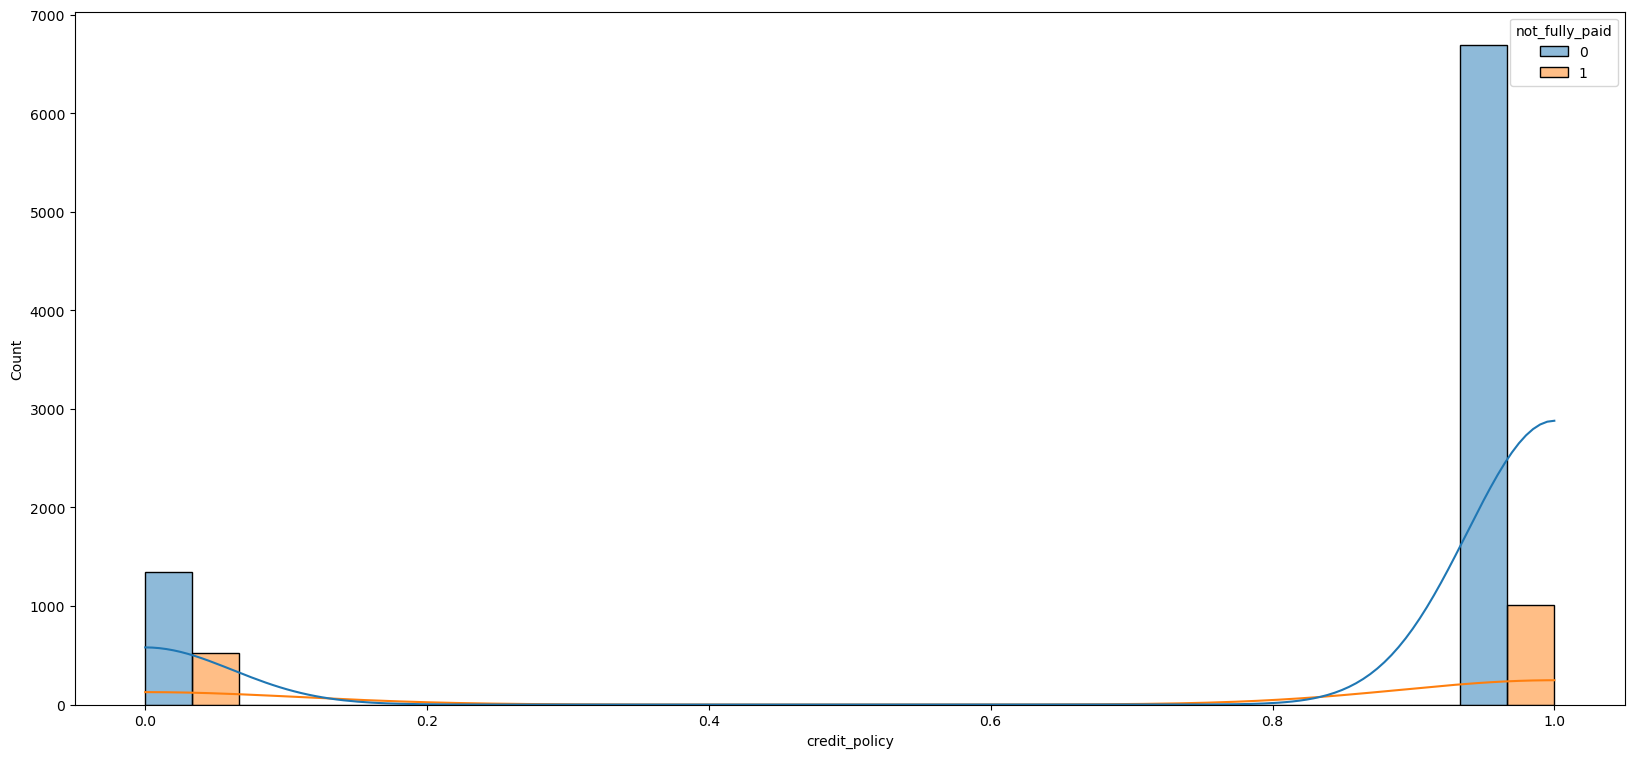

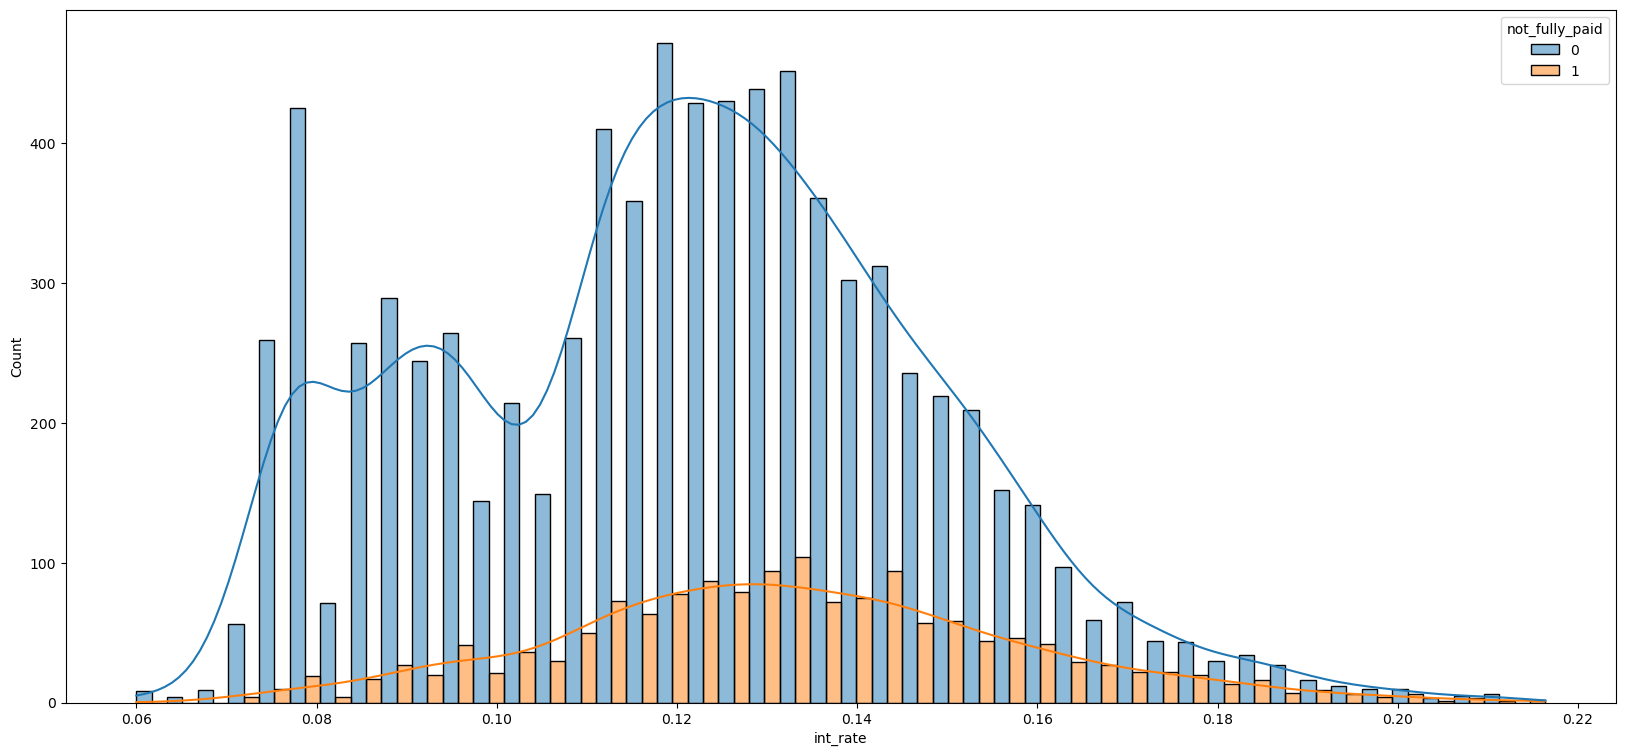

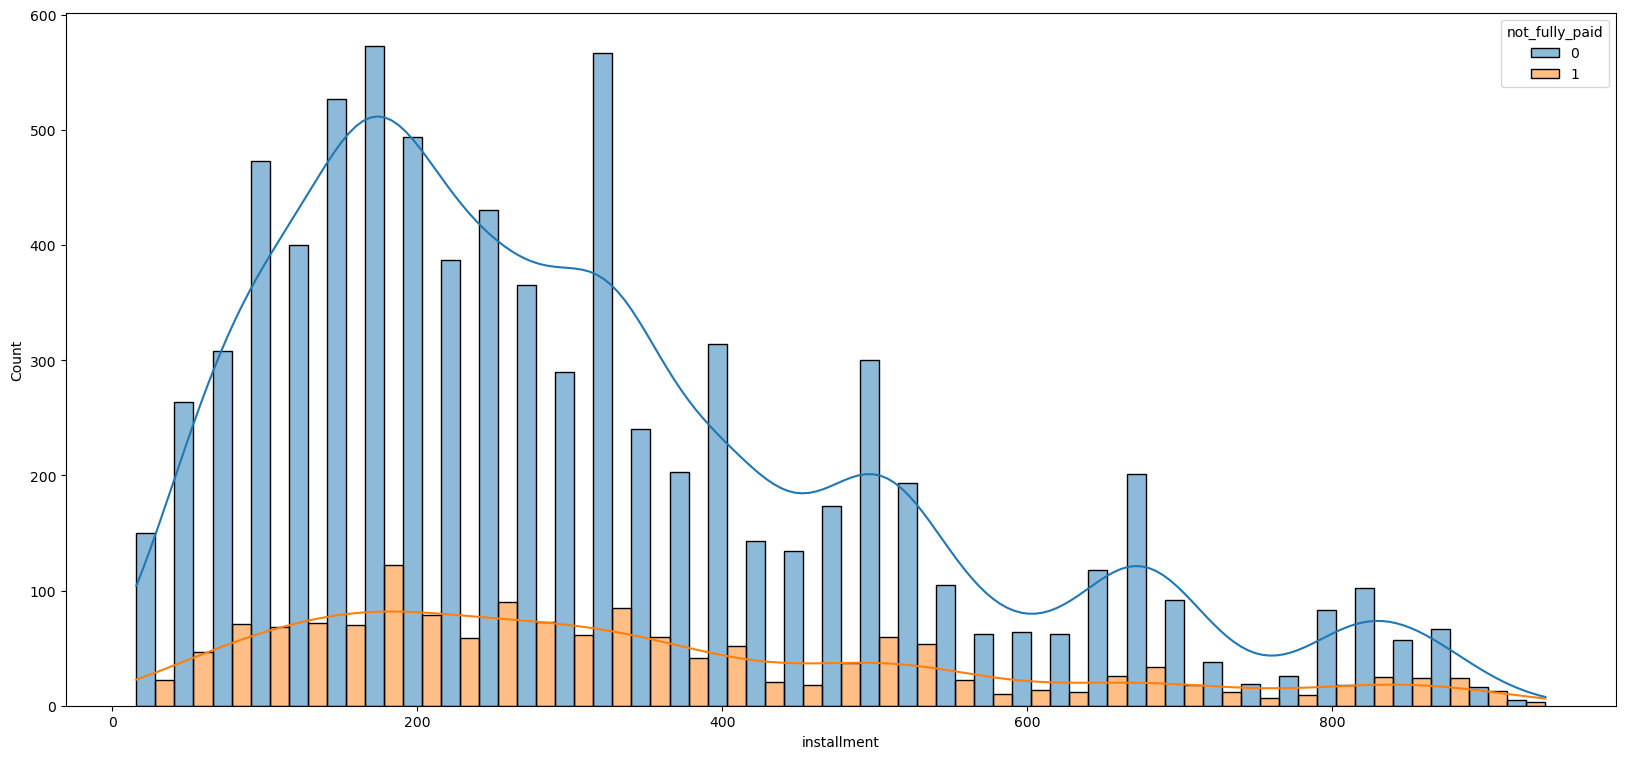

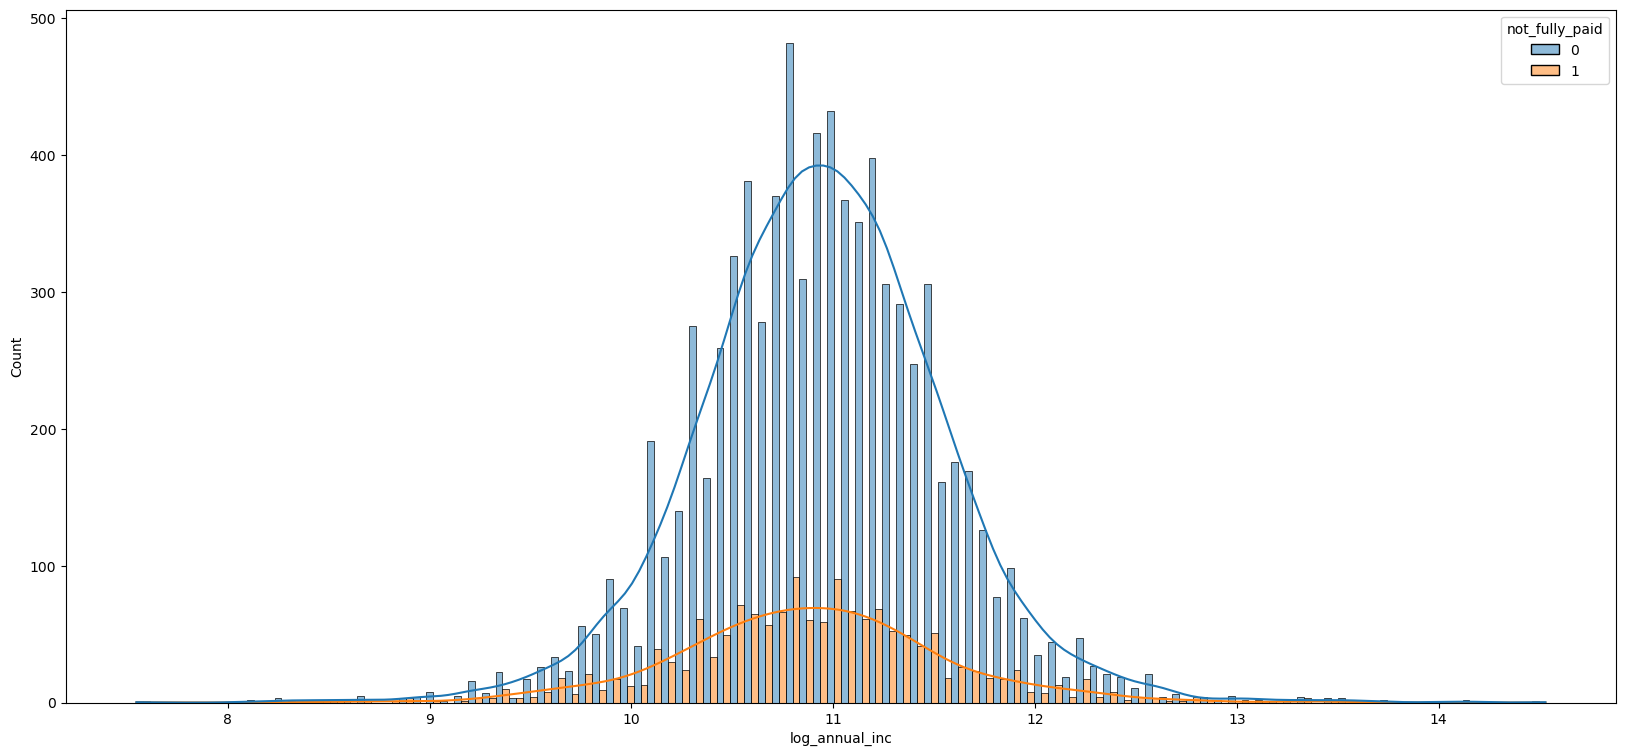

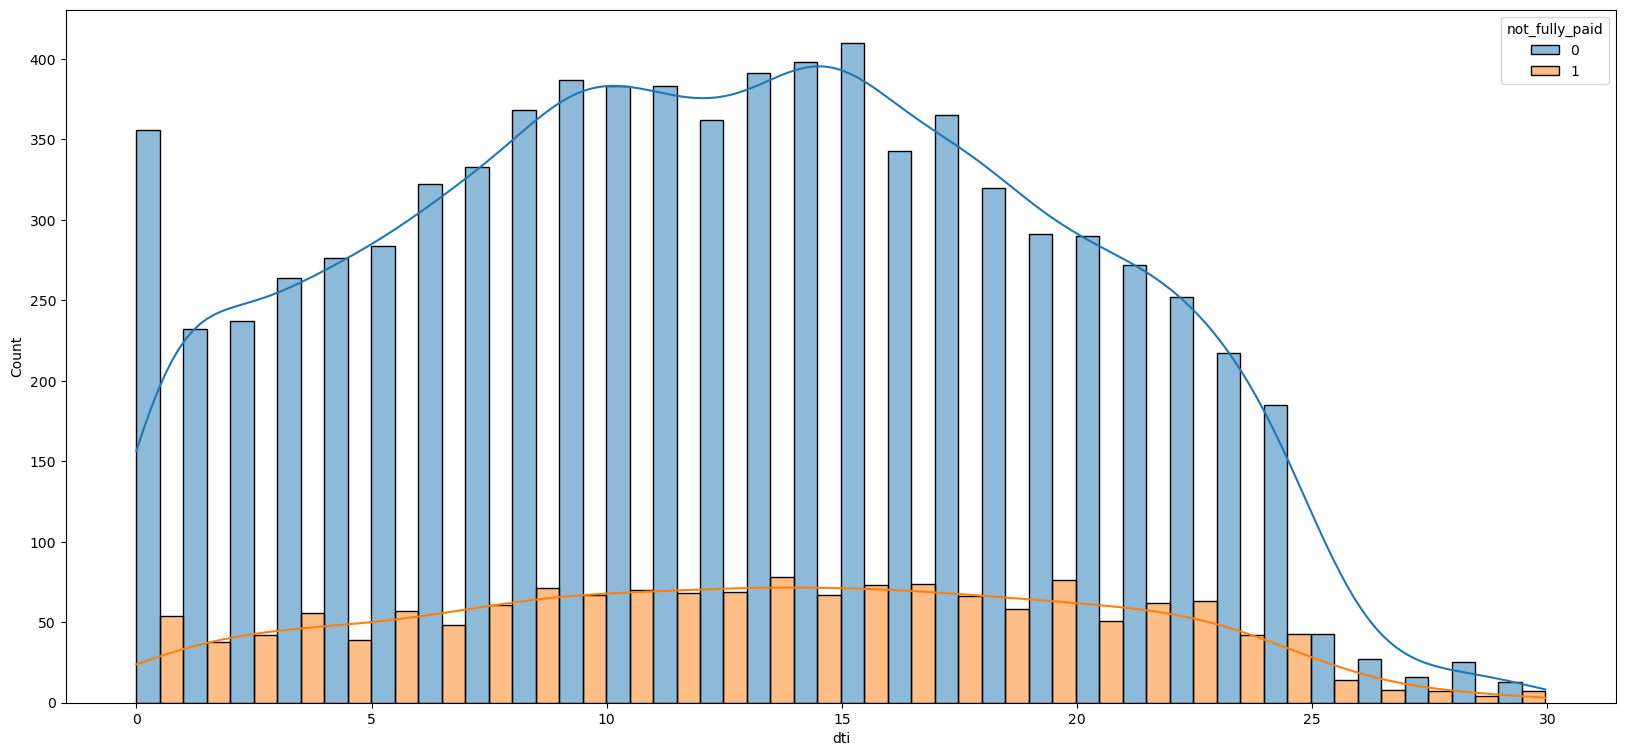

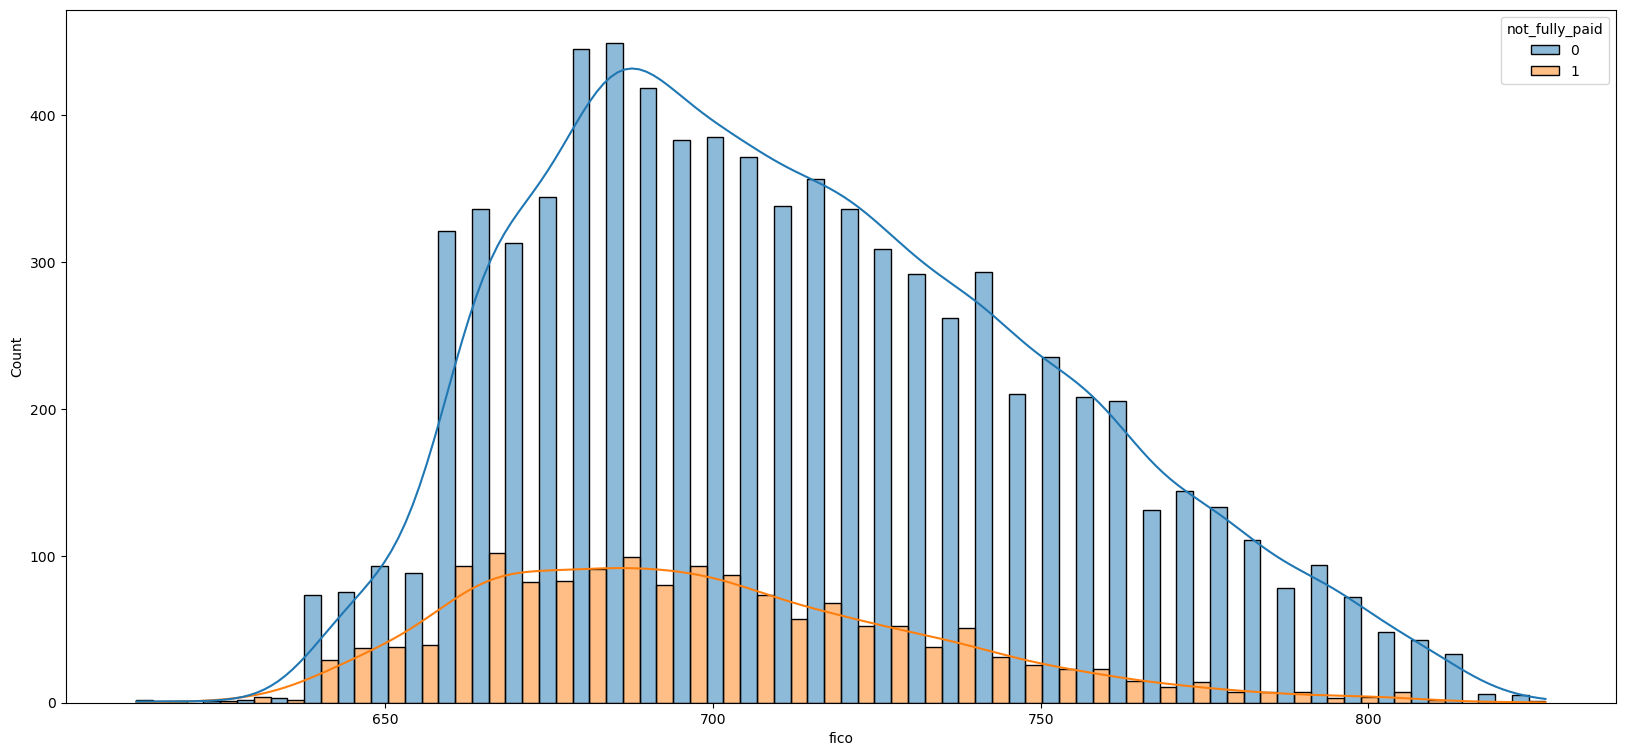

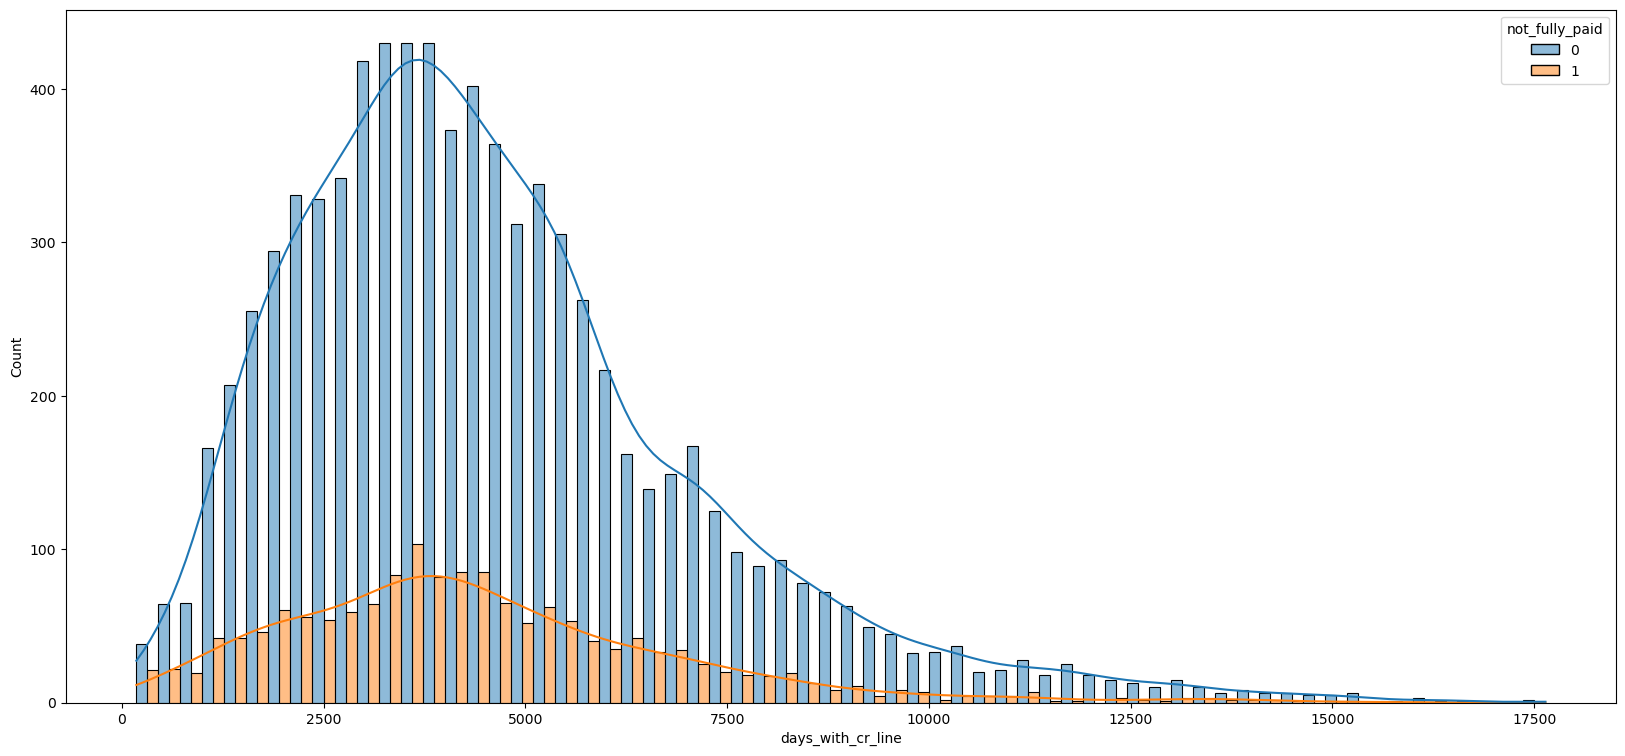

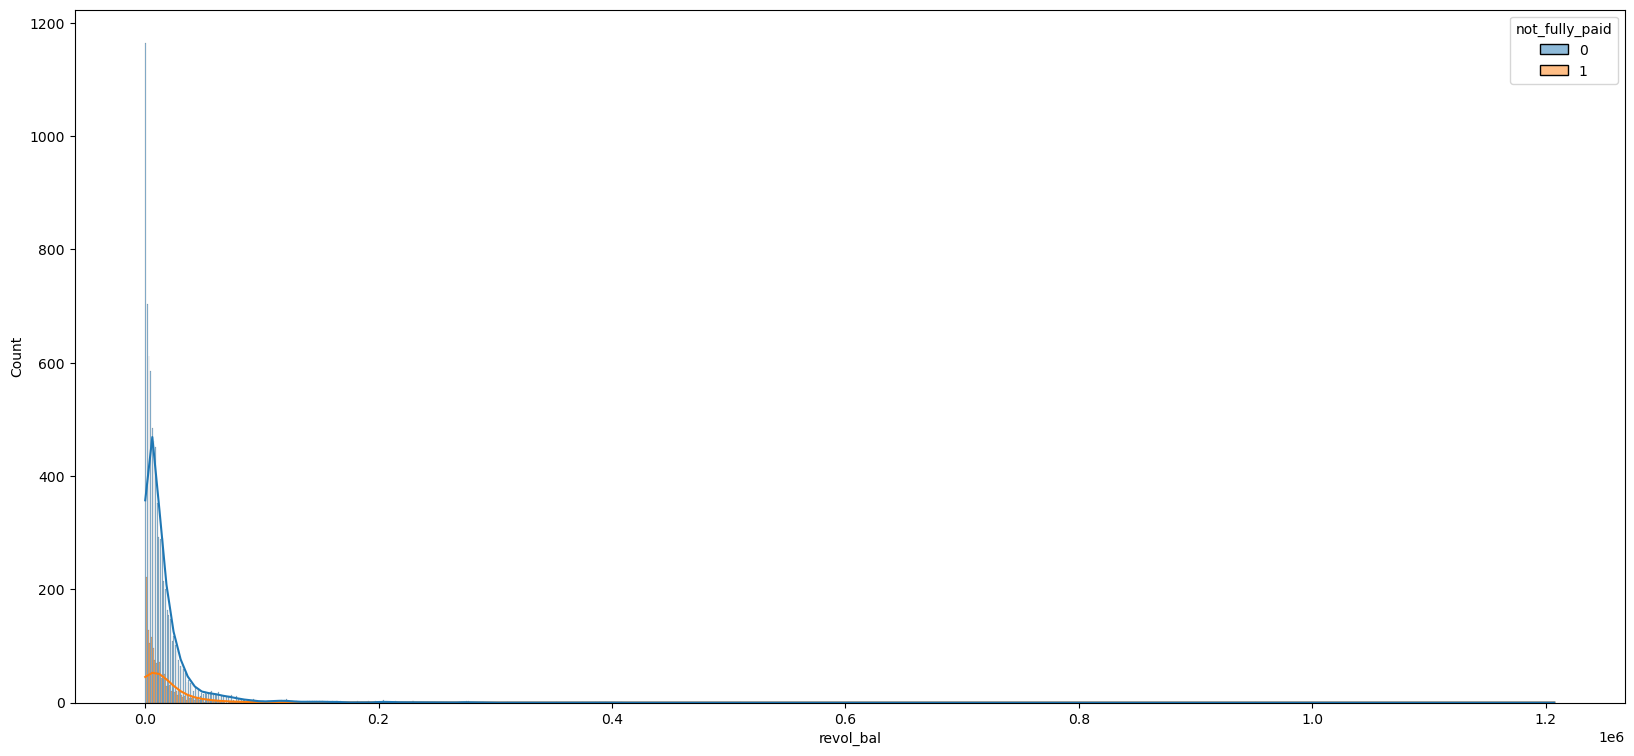

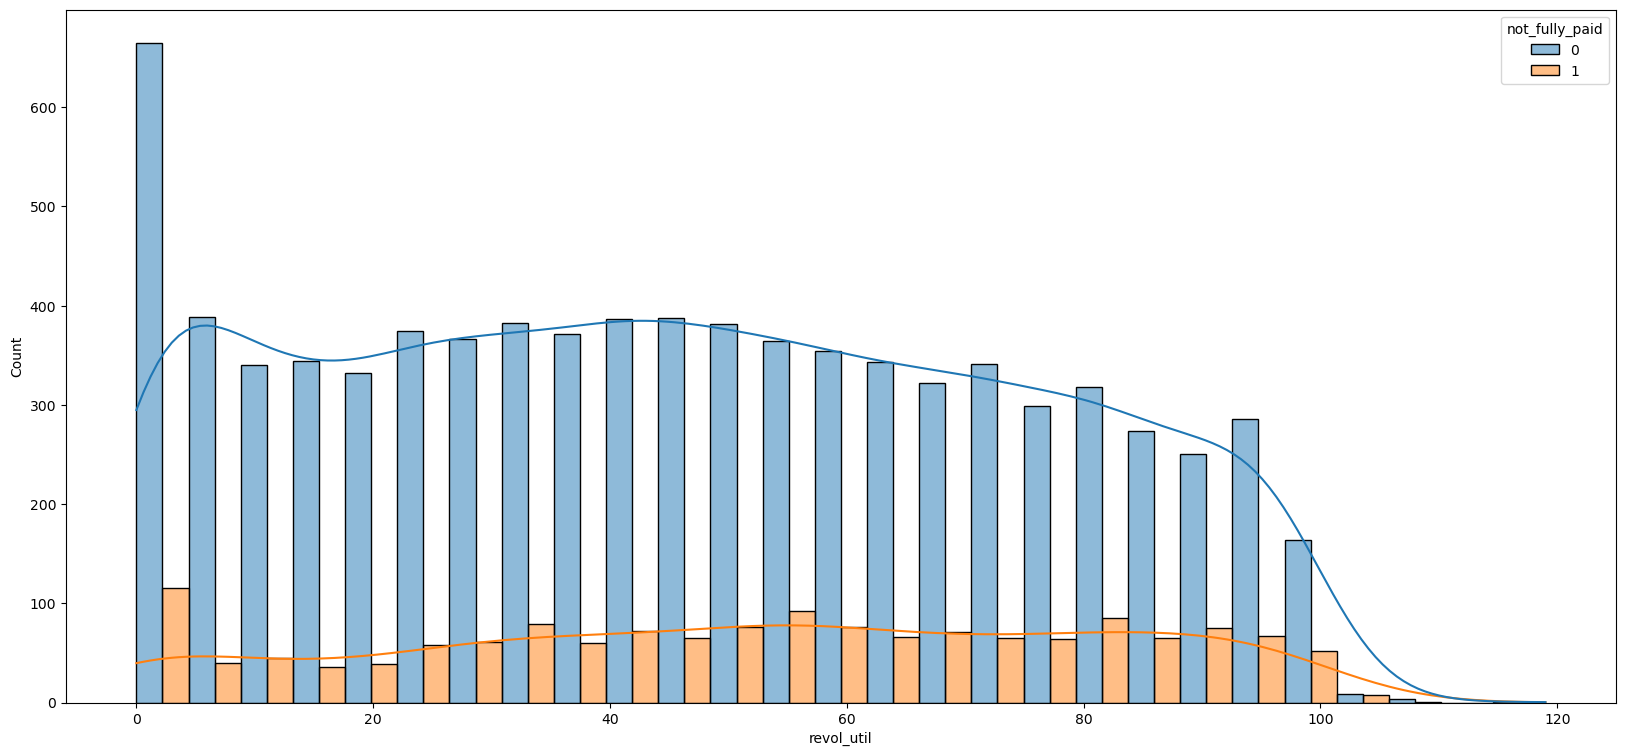

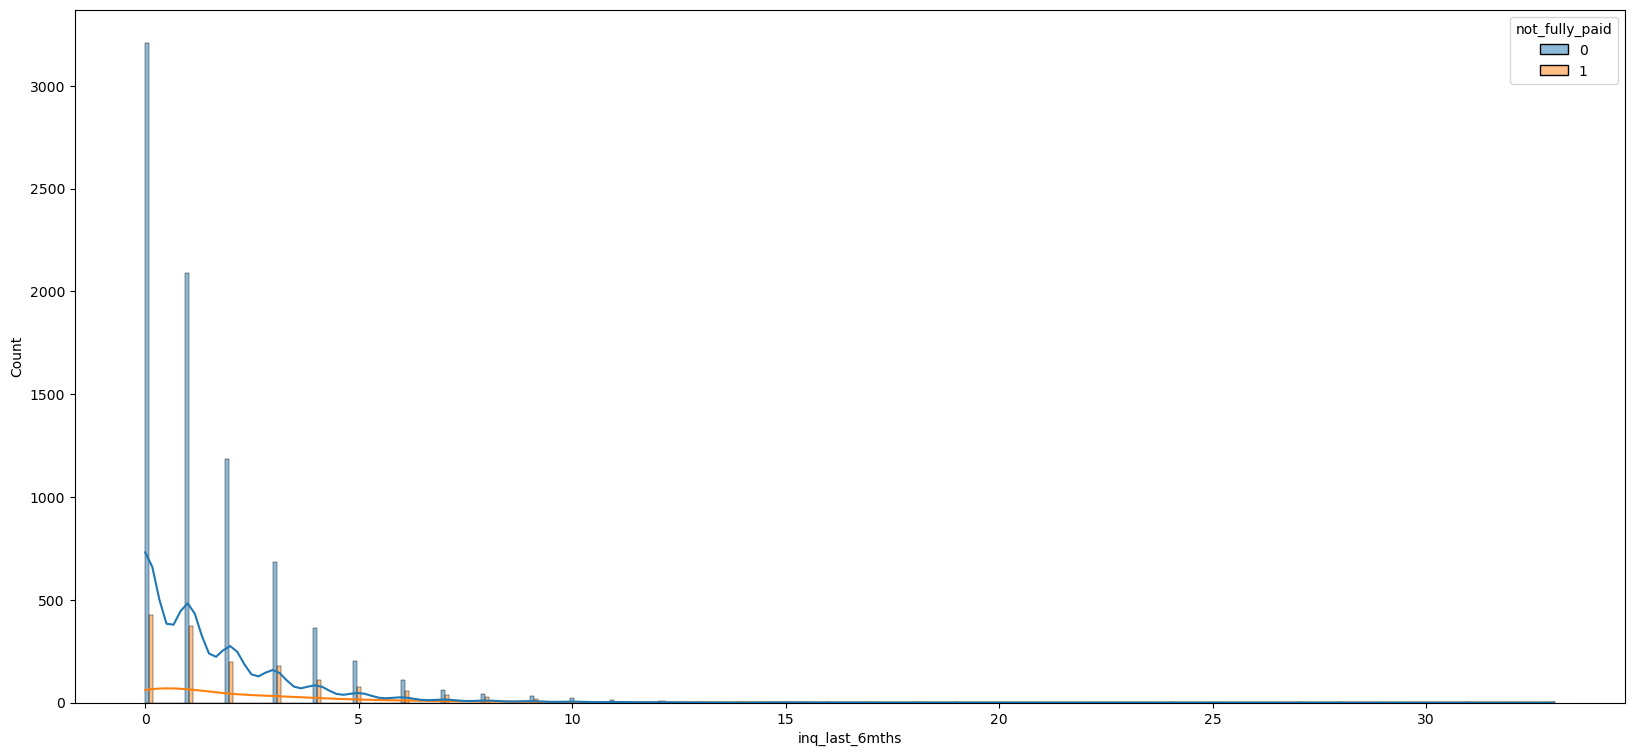

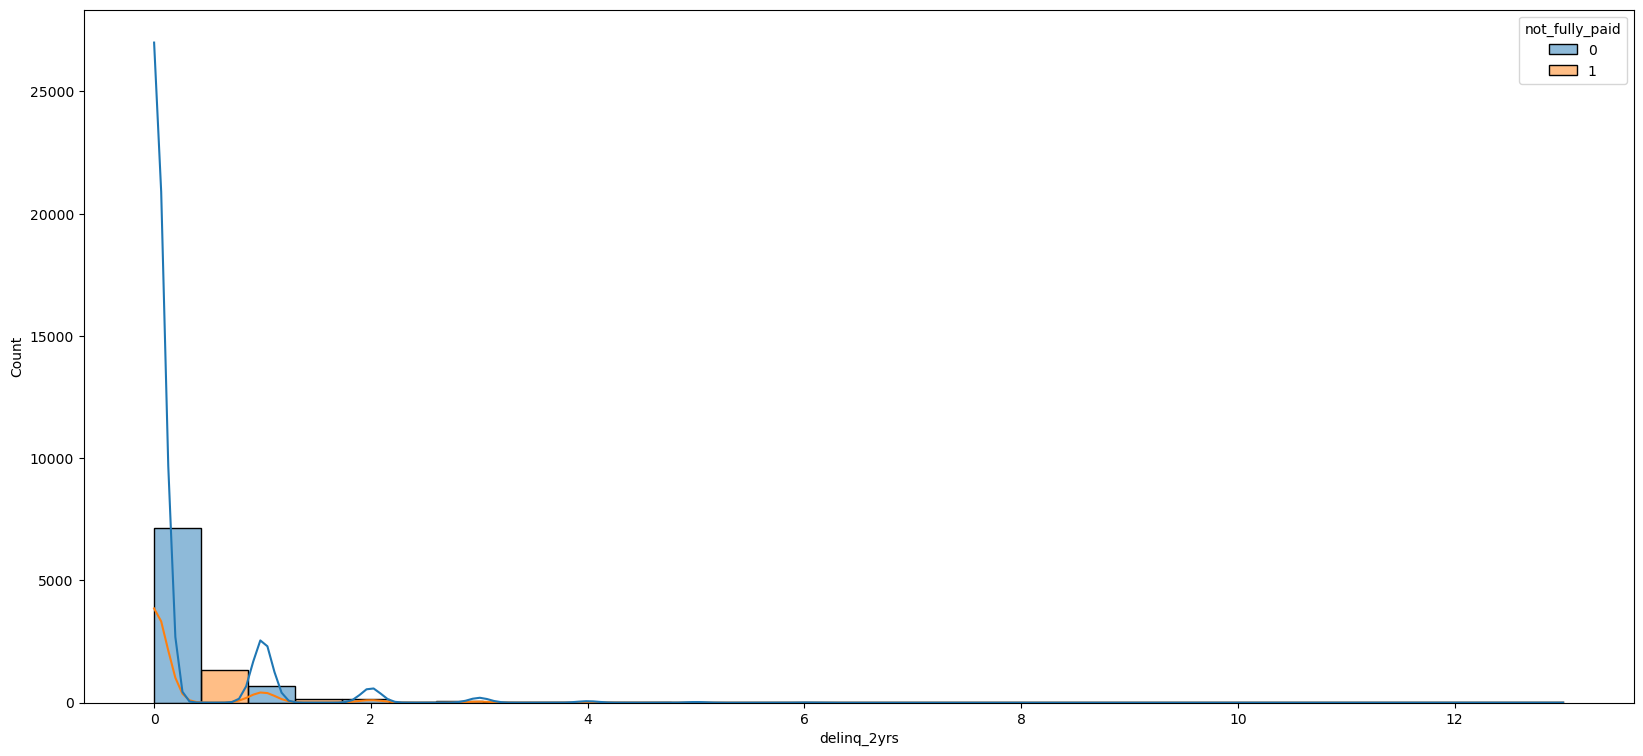

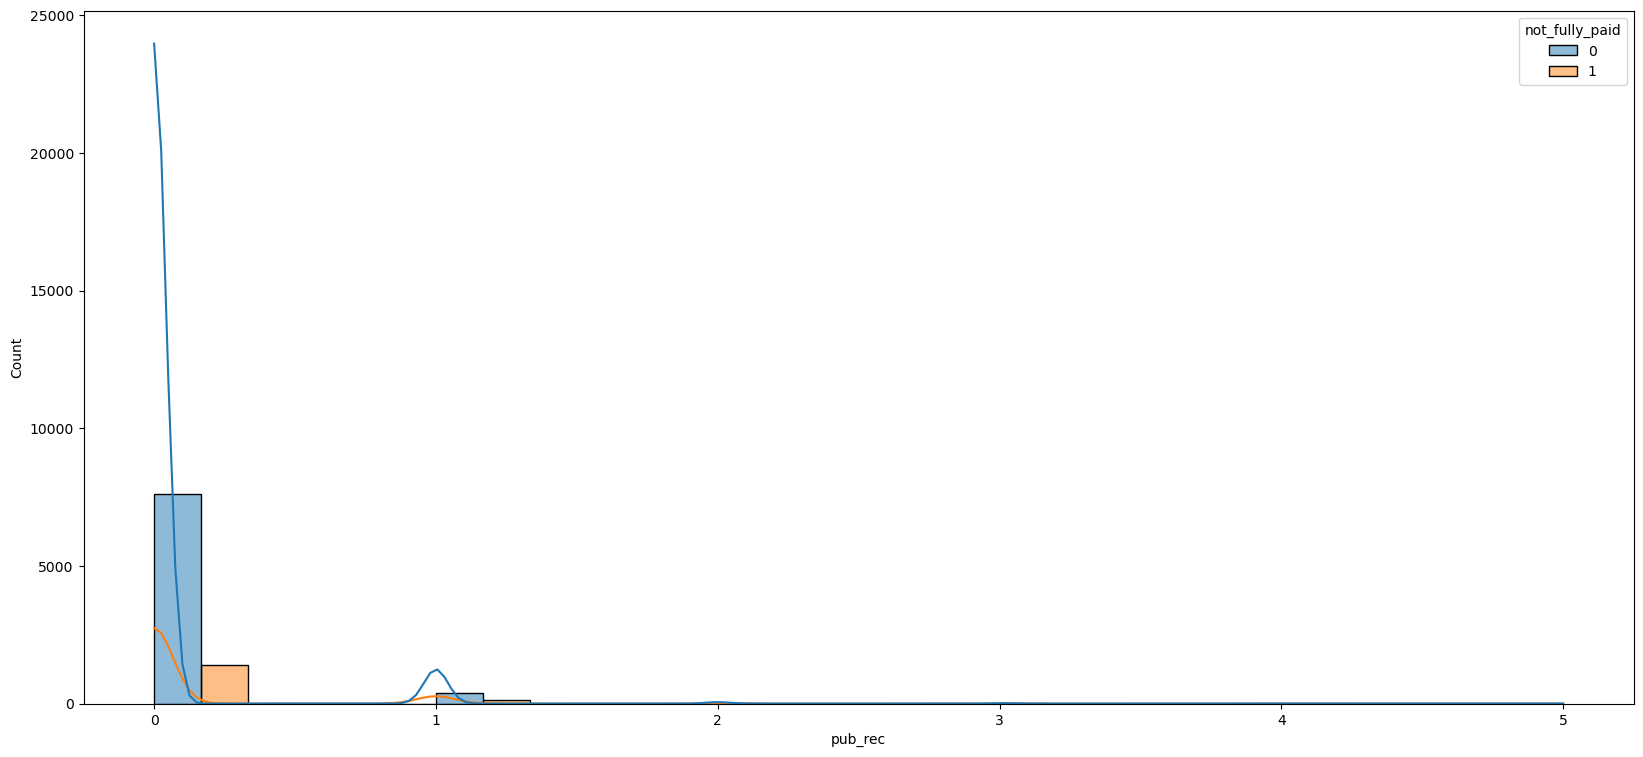

In [14]:
for i in num_col:
    plt.figure(figsize=(20,9))
    sns.histplot(data=df,x=i,hue='not_fully_paid',kde=True,multiple="dodge")
    plt.show();

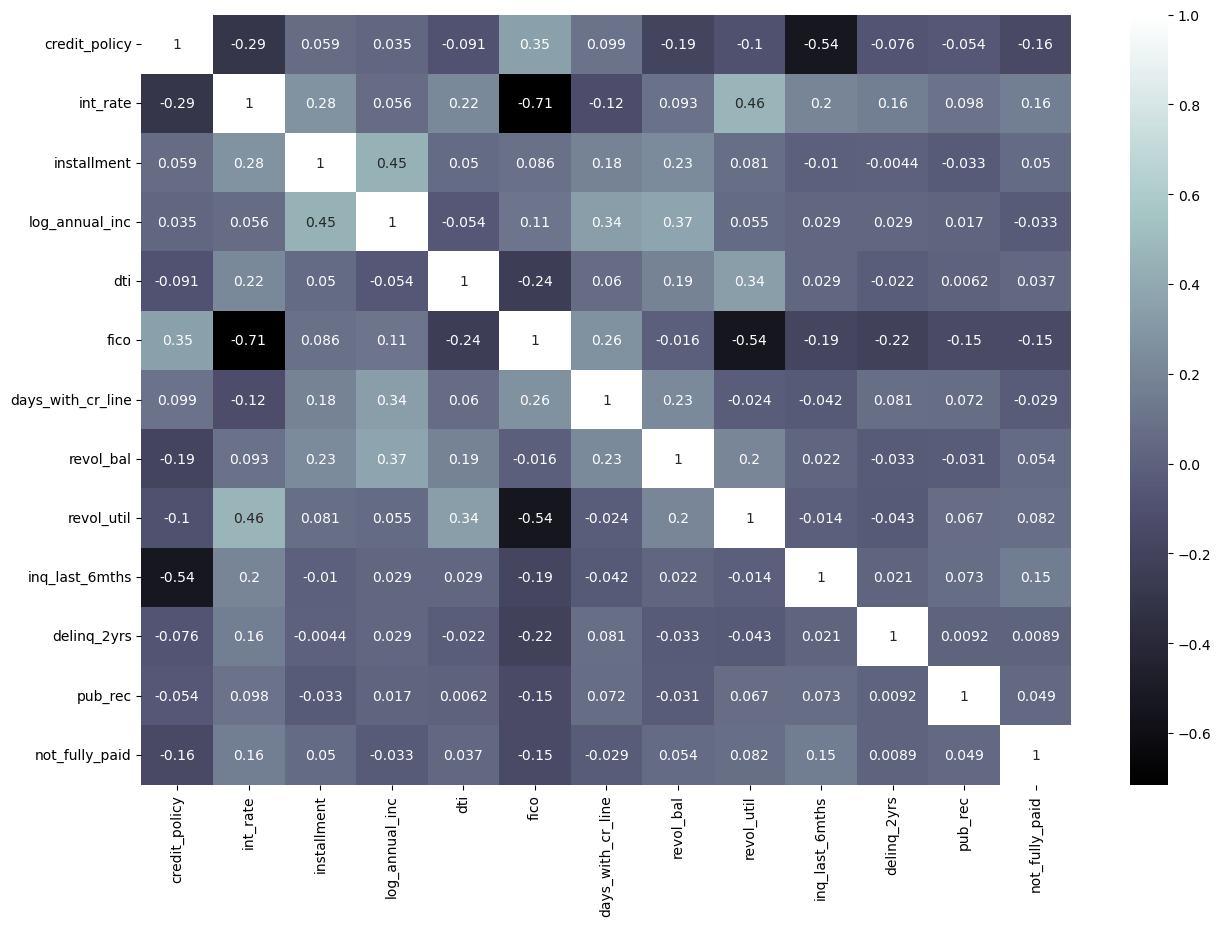

In [15]:
#Correlation Matrix
corr=df.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap='bone')
plt.show();

<AxesSubplot:xlabel='int_rate', ylabel='fico'>

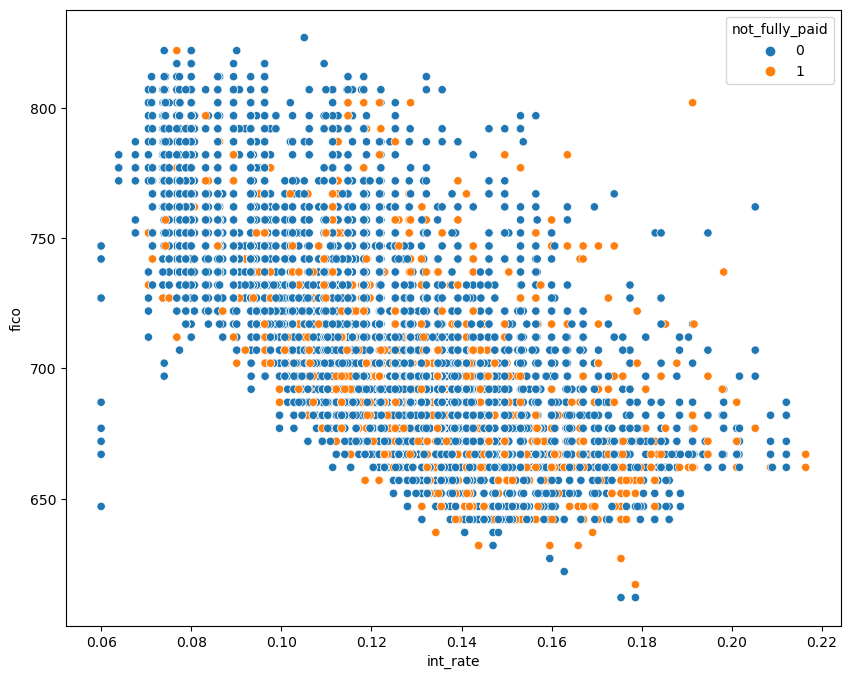

In [16]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df,x='int_rate',y='fico',hue='not_fully_paid')

## Handling SKEW's

credit_policy        -1.539621
int_rate              0.164420
installment           0.912522
log_annual_inc        0.028668
dti                   0.023941
fico                  0.471260
days_with_cr_line     1.155748
revol_bal            11.161058
revol_util            0.059985
inq_last_6mths        3.584151
delinq_2yrs           6.061793
pub_rec               5.126434
not_fully_paid        1.854592
dtype: float64
credit_policy
-1.5393803114408613


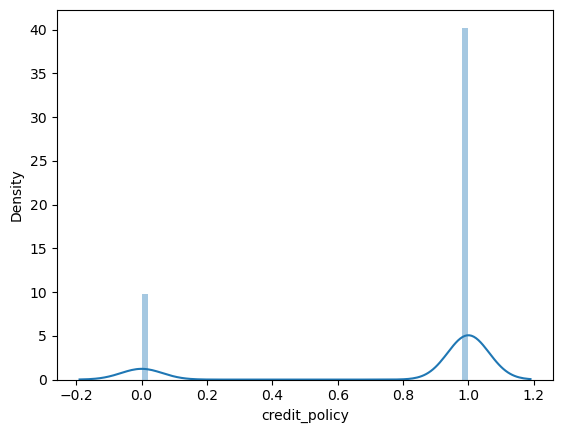

int_rate
0.16439416280317964


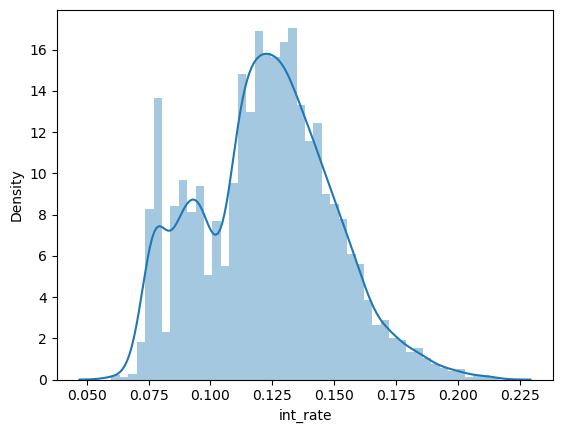

installment
0.9123795470488175


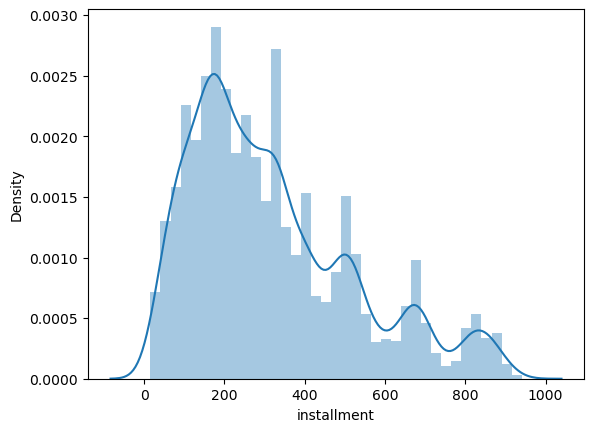

log_annual_inc
0.028663616694390843


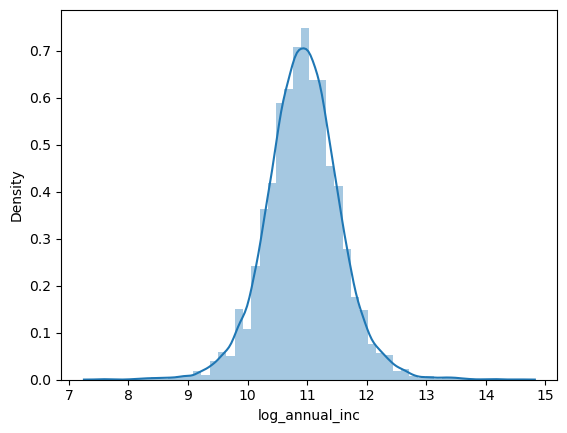

dti
0.02393727340906256


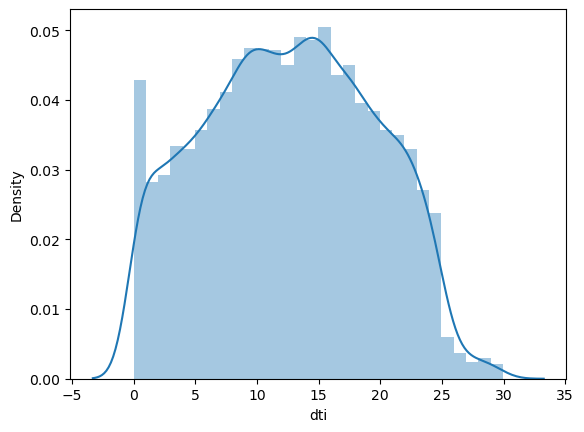

fico
0.47118593325420144


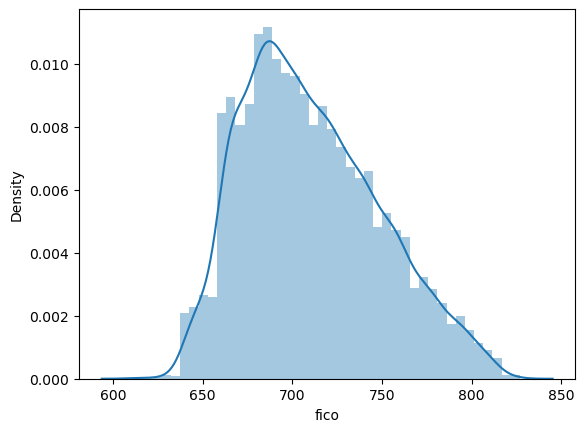

days_with_cr_line
1.1555672187692227


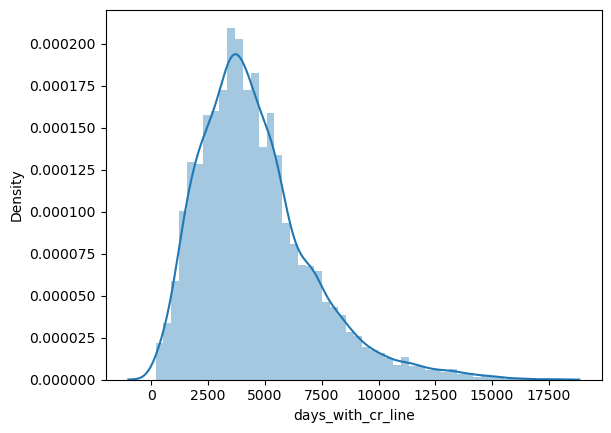

revol_bal
11.15931049753884


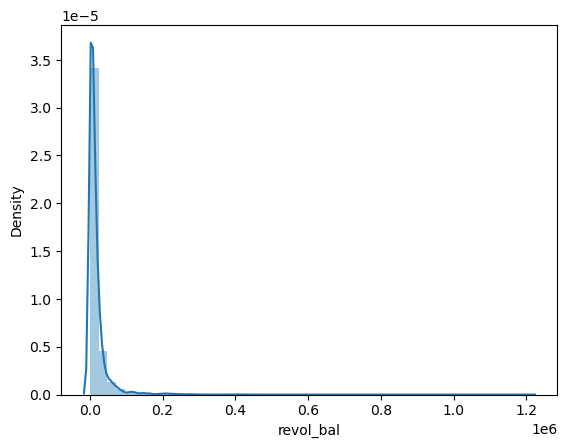

revol_util
0.05997604792027563


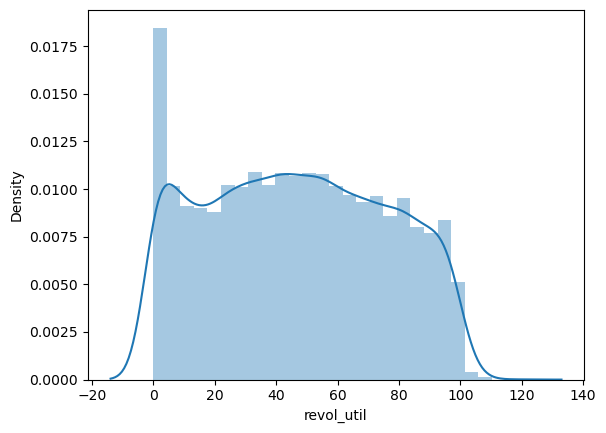

inq_last_6mths
3.583589522053665


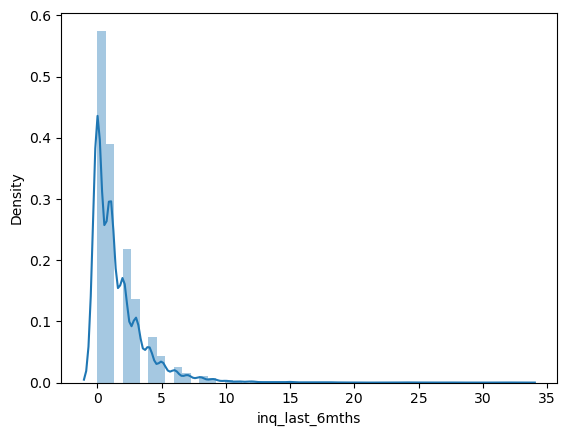

delinq_2yrs
6.060843903702224


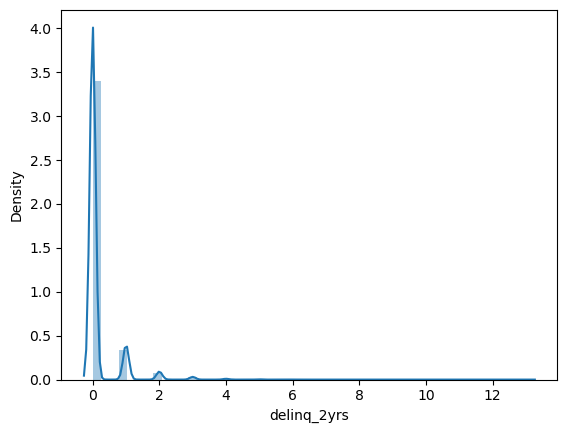

pub_rec
5.125631579599643


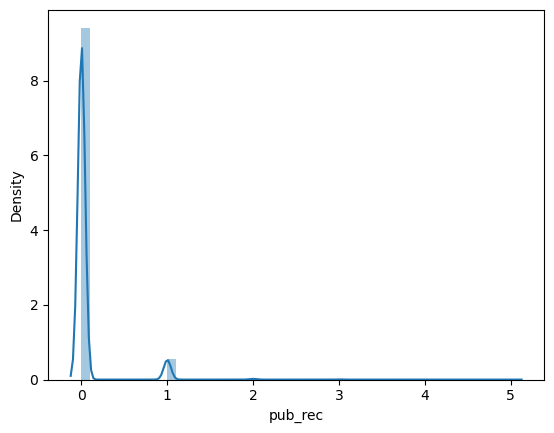

In [17]:
#SKEW Values and Distribution
print(df.skew())
for i in df[num_col]:
    print(i)
    print(skew(df[i]))
    plt.figure()
    sns.distplot(df[i])
    plt.show();

0.2794022046524533


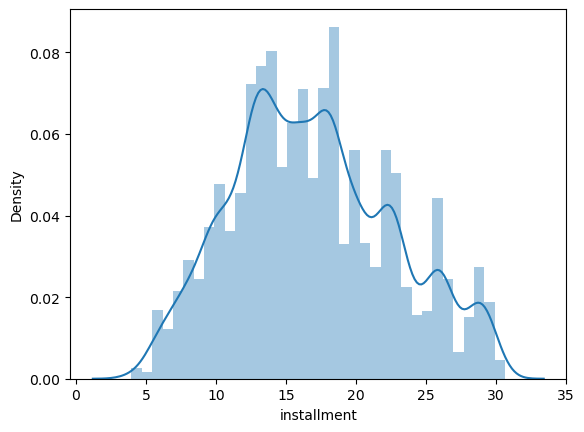

In [18]:
df['installment']=np.sqrt(df['installment'])
print(skew(df['installment']))
sns.distplot(df['installment'])
plt.show();

0.27410868793666776


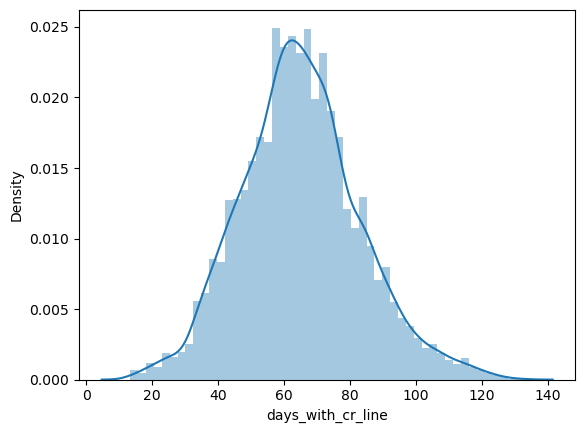

In [19]:
df['days_with_cr_line']=np.sqrt(df['days_with_cr_line'])
print(skew(df['days_with_cr_line']))
sns.distplot(df['days_with_cr_line'])
plt.show();

2.2323430670927142


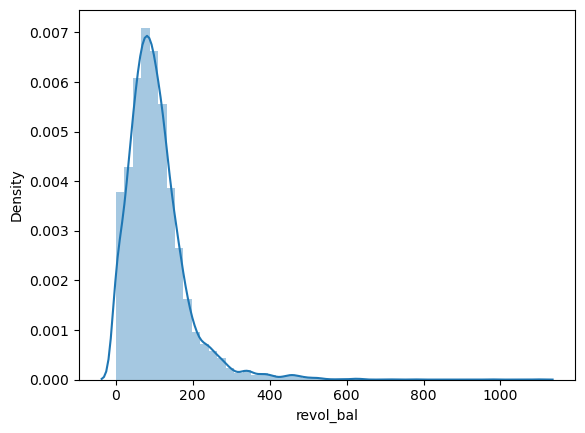

In [20]:
df['revol_bal']=np.sqrt(df['revol_bal'])
print(skew(df['revol_bal']))
sns.distplot(df['revol_bal'])
plt.show();

0.5553422387941481


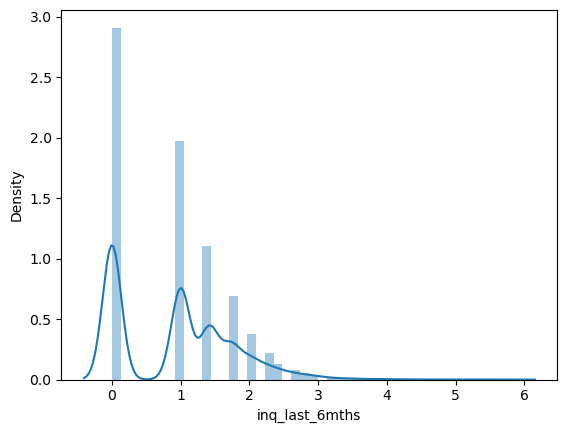

In [21]:
df['inq_last_6mths']=np.sqrt(df['inq_last_6mths'])
print(skew(df['inq_last_6mths']))
sns.distplot(df['inq_last_6mths'])
plt.show();

2.8174627338023366


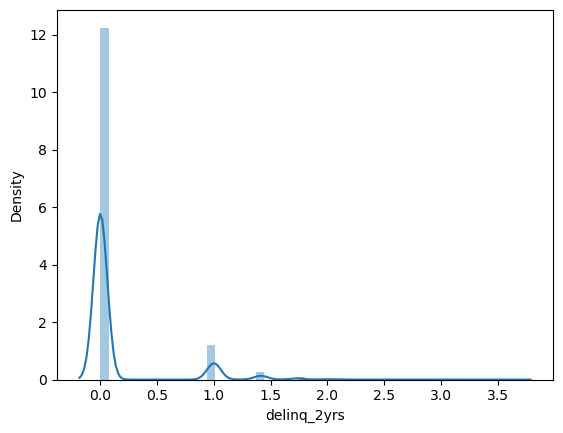

In [22]:
df['delinq_2yrs']=np.sqrt(df['delinq_2yrs'])
print(skew(df['delinq_2yrs']))
sns.distplot(df['delinq_2yrs'])
plt.show();

## Encoding

In [23]:
#using label encoder for purpose column 
le=LabelEncoder()
df['purpose']=le.fit_transform(df['purpose'])

## Spliting X and Y (_Features,_Target)

In [24]:
x=df.iloc[:,:-1]
print(x.head())
y=df.iloc[:,-1]
print(y.head())

   credit_policy  purpose  int_rate  installment  log_annual_inc    dti  fico  \
0              1        2    0.1189    28.794097       11.350407  19.48   737   
1              1        1    0.1071    15.106952       11.082143  14.29   707   
2              1        2    0.1357    19.153590       10.373491  11.63   682   
3              1        2    0.1008    12.741272       11.350407   8.10   712   
4              1        1    0.1426    10.144949       11.299732  14.97   667   

   days_with_cr_line   revol_bal  revol_util  inq_last_6mths  delinq_2yrs  \
0          75.099656  169.864652        52.1             0.0          0.0   
1          52.535702  183.365755        76.7             0.0          0.0   
2          68.629440   59.253692        25.6             1.0          0.0   
3          51.961123  183.485694        73.2             1.0          0.0   
4          63.765194   68.847658        39.5             0.0          1.0   

   pub_rec  
0        0  
1        0  
2        0 

## Scaling 

In [25]:
#scaling features bys using Standard Scaler Method
sc=StandardScaler()
x=sc.fit_transform(x)

### Handling Imbalced Data

In [26]:
#Using SOMTE to balance the data
smote=SMOTE(sampling_strategy='minority')
x,y=smote.fit_resample(x,y)

In [27]:
y.value_counts()

0    8045
1    8045
Name: not_fully_paid, dtype: int64

#### Train Test Split for Feature & Target

In [28]:
#spliting train & test for features and target
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0,stratify=y)

In [29]:
lr=LogisticRegression()

lr.fit(xtrain,ytrain)
ypred_lr=lr.predict(xtest)

train=lr.score(xtrain,ytrain)
test=lr.score(xtest,ytest)

ytrain_pred_lr=lr.predict_proba(xtrain)
ytest_pred_lr=lr.predict_proba(xtest)

print('\nLogisticRegression\n')
print(f'Train: {train}\nTest: {test}\n')
print(f'roc_auc Train Acc:{roc_auc_score(ytrain,ytrain_pred_lr[:,1])}\nroc_auc test Acc:{roc_auc_score(ytest,ytest_pred_lr[:,1])}\n')
print(classification_report(ytest,ypred_lr))


LogisticRegression

Train: 0.6166207937494451
Test: 0.6096954630205096

roc_auc Train Acc:0.6765505367506982
roc_auc test Acc:0.6677455827331312

              precision    recall  f1-score   support

           0       0.61      0.61      0.61      2414
           1       0.61      0.61      0.61      2413

    accuracy                           0.61      4827
   macro avg       0.61      0.61      0.61      4827
weighted avg       0.61      0.61      0.61      4827



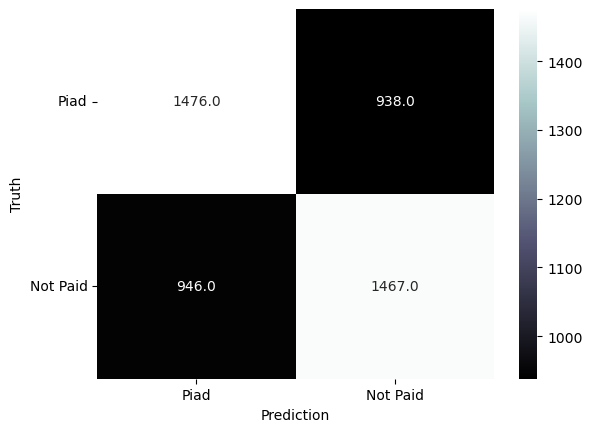

In [30]:
#confusion matrix for Logistics Regression
cm_lr=confusion_matrix(ytest,ypred_lr)
sns.heatmap(cm_lr,cmap='bone',annot=True,fmt=".1f",xticklabels=['Piad','Not Paid'],yticklabels=['Piad','Not Paid'])
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.yticks(rotation=0)
plt.show();

In [31]:
fpr_lr,tpr_lr,thresholds_lr=roc_curve(ytest,ytest_pred_lr[:,1])

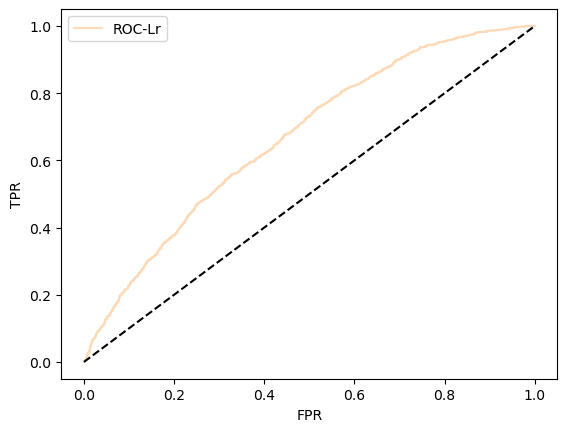

In [32]:
#plot roc curve for LR
plt.plot(fpr_lr,tpr_lr,color='peachpuff',label="ROC-Lr")
plt.plot([0,1],color='black',linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show();

In [33]:
rf=RandomForestClassifier()

rf.fit(xtrain,ytrain)
ypred_rf=rf.predict(xtest)

train=rf.score(xtrain,ytrain)
test=rf.score(xtest,ytest)

ytrain_pred_rf=rf.predict_proba(xtrain)
ytest_pred_rf=rf.predict_proba(xtest)

print('\nRandom Forest Classifier\n')
print(f'Train: {train}\nTest: {test}\n')
print(f'roc_auc Train Acc:{roc_auc_score(ytrain,ytrain_pred_rf[:,1])}\nroc_auc Test Acc:{roc_auc_score(ytest,ytest_pred_rf[:,1])}\n')
print(classification_report(ytest,ypred_rf))


Random Forest Classifier

Train: 1.0
Test: 0.9007665216490574

roc_auc Train Acc:1.0
roc_auc Test Acc:0.9667103692337591

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      2414
           1       0.92      0.88      0.90      2413

    accuracy                           0.90      4827
   macro avg       0.90      0.90      0.90      4827
weighted avg       0.90      0.90      0.90      4827



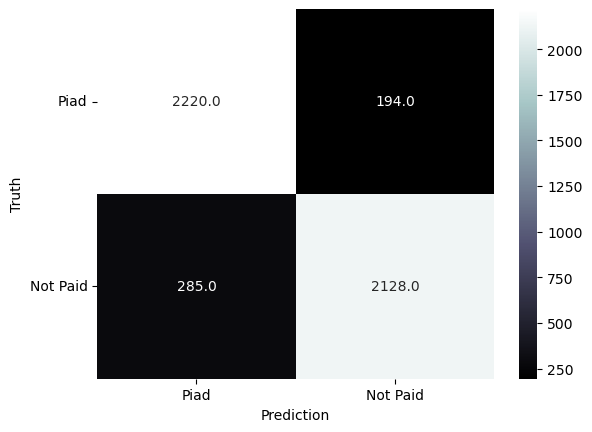

In [34]:
#confusion matrix for RF
cm_rf=confusion_matrix(ytest,ypred_rf)
sns.heatmap(cm_rf,cmap='bone',annot=True,fmt=".1f",xticklabels=['Piad','Not Paid'],yticklabels=['Piad','Not Paid'])
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.yticks(rotation=0)
plt.show();

In [35]:
fpr_rf,tpr_rf,thresholds_rf=roc_curve(ytest,ytest_pred_rf[:,1])

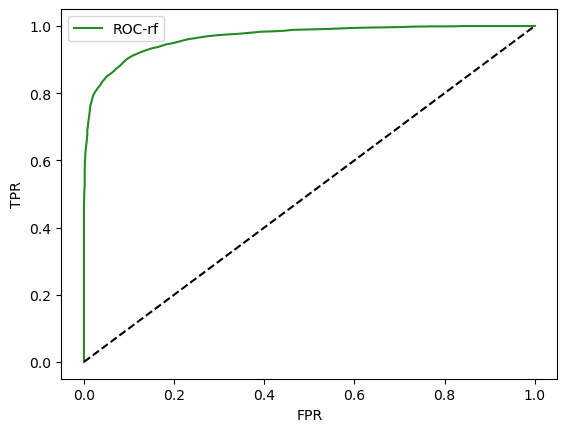

In [36]:
#plot roc curve for RF
plt.plot(fpr_rf,tpr_rf,color='forestgreen',label="ROC-rf")
plt.plot([0,1],color='black',linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show();

In [37]:
xgb=XGBClassifier()

xgb.fit(xtrain,ytrain)
ypred_xgb=xgb.predict(xtest)

train=xgb.score(xtrain,ytrain)
test=xgb.score(xtest,ytest)

ytrain_pred_xgb=xgb.predict_proba(xtrain)
ytest_pred_xgb=xgb.predict_proba(xtest)

print('\n')
print('XGBoost Classifier\n')
print(f'Train: {train}\nTest: {test}\n')
print(f'roc_auc Train Acc:{roc_auc_score(ytrain,ytrain_pred_xgb[:,1])}\nroc_auc Test Acc:{roc_auc_score(ytest,ytest_pred_xgb[:,1])}\n')
print(classification_report(ytest,ypred_xgb))



XGBoost Classifier

Train: 0.9708780964219125
Test: 0.886886264760721

roc_auc Train Acc:0.9982823561433459
roc_auc Test Acc:0.9417768157910188

              precision    recall  f1-score   support

           0       0.85      0.95      0.89      2414
           1       0.94      0.83      0.88      2413

    accuracy                           0.89      4827
   macro avg       0.89      0.89      0.89      4827
weighted avg       0.89      0.89      0.89      4827



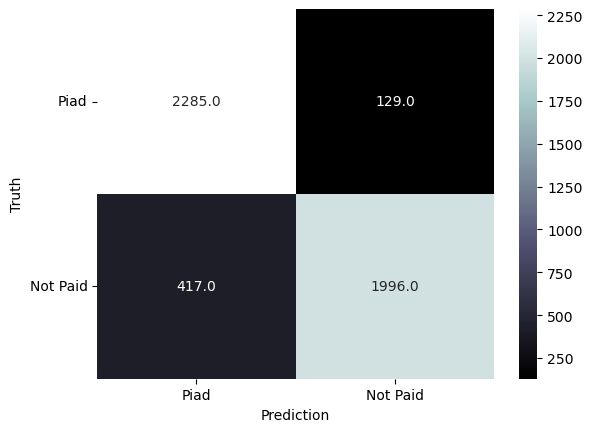

In [38]:
#confusion matrix for XGB
cm_xgb=confusion_matrix(ytest,ypred_xgb)
sns.heatmap(cm_xgb,cmap='bone',annot=True,fmt=".1f",xticklabels=['Piad','Not Paid'],yticklabels=['Piad','Not Paid'])
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.yticks(rotation=0)
plt.show();

In [39]:
fpr_xgb,tpr_xgb,thresholds_xgb=roc_curve(ytest,ytest_pred_xgb[:,1])

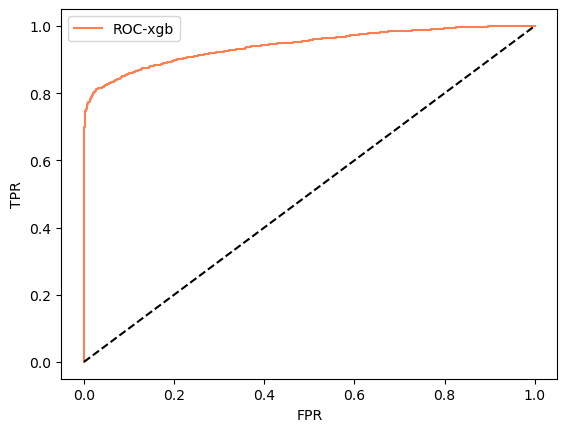

In [40]:
#plot roc curve for XGB
plt.plot(fpr_xgb,tpr_xgb,color='coral',label="ROC-xgb")
plt.plot([0,1],color='black',linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show();

In [41]:
svc=SVC(probability=True)

svc.fit(xtrain,ytrain)
ypred_svc=svc.predict(xtest)

train=svc.score(xtrain,ytrain)
test=svc.score(xtest,ytest)

ytrain_pred_svc=svc.predict_proba(xtrain)
ytest_pred_svc=svc.predict_proba(xtest)

print('\n')
print('Support Vector Machine "SVC"\n')
print(f'Train: {train}\nTest: {test}\n')
print(f'roc_auc Train Acc:{roc_auc_score(ytrain,ytrain_pred_svc[:,1])}\nroc_auc Train Acc:{roc_auc_score(ytest,ytest_pred_svc[:,1])}\n')
print(classification_report(ytest,ypred_svc))



Support Vector Machine "SVC"

Train: 0.7175708070673888
Test: 0.6809612595815207

roc_auc Train Acc:0.7983181576015885
roc_auc Train Acc:0.7564667152619529

              precision    recall  f1-score   support

           0       0.68      0.68      0.68      2414
           1       0.68      0.68      0.68      2413

    accuracy                           0.68      4827
   macro avg       0.68      0.68      0.68      4827
weighted avg       0.68      0.68      0.68      4827



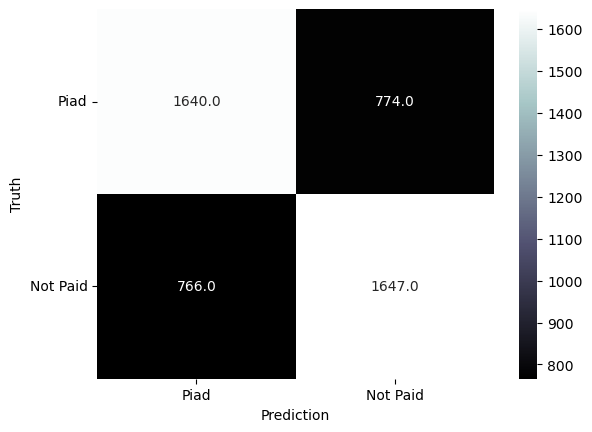

In [42]:
#confusion matrix for SVC
cm_svc=confusion_matrix(ytest,ypred_svc)
sns.heatmap(cm_svc,cmap='bone',annot=True,fmt=".1f",xticklabels=['Piad','Not Paid'],yticklabels=['Piad','Not Paid'])
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.yticks(rotation=0)
plt.show();

In [43]:
fpr_svc,tpr_svc,thresholds_svc=roc_curve(ytest,ytest_pred_svc[:,1])

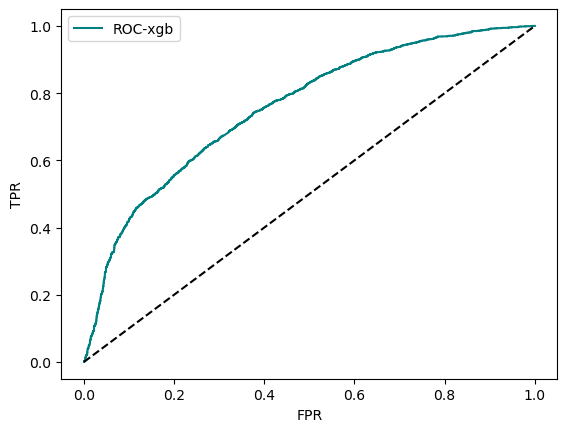

In [44]:
#plot roc curev for SVC
plt.plot(fpr_svc,tpr_svc,color='teal',label="ROC-xgb")
plt.plot([0,1],color='black',linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show();

In [45]:
ann=Sequential()
ann.add(Dense(units=90))
ann.add(Dense(units=100))
ann.add(Dense(units=190,activation="relu"))
ann.add(Dense(units=1,activation="sigmoid"))
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
ann.fit(xtrain,ytrain,batch_size=30,epochs=111,validation_data=(xtest,ytest))
ypred_ann=ann.predict(xtest)

Epoch 1/111
376/376 [==============================] - 4s 6ms/step - loss: 0.6405 - accuracy: 0.6251 - val_loss: 0.6325 - val_accuracy: 0.6304
Epoch 2/111
376/376 [==============================] - 2s 5ms/step - loss: 0.6248 - accuracy: 0.6432 - val_loss: 0.6281 - val_accuracy: 0.6474
Epoch 3/111
376/376 [==============================] - 2s 5ms/step - loss: 0.6198 - accuracy: 0.6530 - val_loss: 0.6332 - val_accuracy: 0.6428
Epoch 4/111
376/376 [==============================] - 2s 5ms/step - loss: 0.6144 - accuracy: 0.6539 - val_loss: 0.6182 - val_accuracy: 0.6513
Epoch 5/111
376/376 [==============================] - 2s 5ms/step - loss: 0.6081 - accuracy: 0.6645 - val_loss: 0.6181 - val_accuracy: 0.6536
Epoch 6/111
376/376 [==============================] - 2s 5ms/step - loss: 0.6035 - accuracy: 0.6659 - val_loss: 0.6083 - val_accuracy: 0.6576
Epoch 7/111
376/376 [==============================] - 2s 5ms/step - loss: 0.5980 - accuracy: 0.6763 - val_loss: 0.6021 - val_accuracy: 0.6694

Epoch 58/111
376/376 [==============================] - 2s 5ms/step - loss: 0.3700 - accuracy: 0.8353 - val_loss: 0.5432 - val_accuracy: 0.7624
Epoch 59/111
376/376 [==============================] - 2s 5ms/step - loss: 0.3597 - accuracy: 0.8440 - val_loss: 0.5569 - val_accuracy: 0.7628
Epoch 60/111
376/376 [==============================] - 2s 5ms/step - loss: 0.3496 - accuracy: 0.8469 - val_loss: 0.5900 - val_accuracy: 0.7674
Epoch 61/111
376/376 [==============================] - 2s 5ms/step - loss: 0.3533 - accuracy: 0.8421 - val_loss: 0.5388 - val_accuracy: 0.7781
Epoch 62/111
376/376 [==============================] - 2s 5ms/step - loss: 0.3477 - accuracy: 0.8453 - val_loss: 0.6055 - val_accuracy: 0.7481
Epoch 63/111
376/376 [==============================] - 2s 5ms/step - loss: 0.3518 - accuracy: 0.8428 - val_loss: 0.5712 - val_accuracy: 0.7734
Epoch 64/111
376/376 [==============================] - 2s 4ms/step - loss: 0.3522 - accuracy: 0.8436 - val_loss: 0.5918 - val_accuracy:

In [46]:
ypred=ypred_ann>0.5

In [47]:
train=ann.evaluate(xtrain,ytrain)
test=ann.evaluate(xtest,ytest)

ytrain_pred_ann=ann.predict(xtrain)
ytest_pred_ann=ann.predict(xtest)

print(f'\ntrain: {train}\n test: {test}\n')
ytrain_pred_ann=ann.predict(xtrain)
ytest_pred_ann=ann.predict(xtest)

print(f'\nroc_auc Train Acc:{roc_auc_score(ytrain,ytrain_pred_ann)}\nroc_auc Test Acc:{roc_auc_score(ytest,ytest_pred_ann)}\n')
print(classification_report(ytest,ypred))

151/151 [==============================] - 0s 2ms/step

train: [0.23815681040287018, 0.9038444757461548]
 test: [0.5690689086914062, 0.794489324092865]

151/151 [==============================] - 0s 2ms/step

roc_auc Train Acc:0.9671481417296298
roc_auc Test Acc:0.8591793073351986

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      2414
           1       0.79      0.80      0.80      2413

    accuracy                           0.79      4827
   macro avg       0.79      0.79      0.79      4827
weighted avg       0.79      0.79      0.79      4827



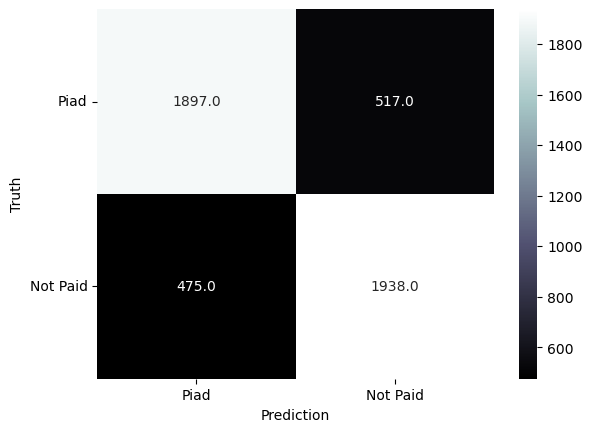

In [48]:
#confusion matrix for ANN
cm_ann=confusion_matrix(ytest,ypred)
sns.heatmap(cm_ann,cmap='bone',annot=True,fmt=".1f",xticklabels=['Piad','Not Paid'],yticklabels=['Piad','Not Paid'])
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.yticks(rotation=0)
plt.show();

In [49]:
fpr_ann,tpr_ann,thresholds_ann=roc_curve(ytest,ytest_pred_ann)

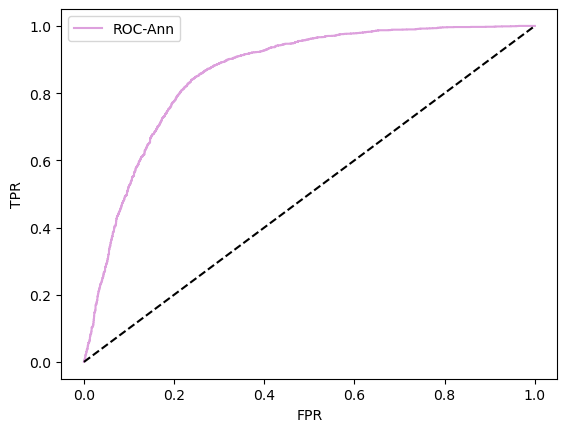

In [50]:
#plot roc curve for ANN
plt.plot(fpr_ann,tpr_ann,color='plum',label="ROC-Ann")
plt.plot([0,1],color='black',linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show();

## ROC Curve 

In [51]:
auc_lr=auc(fpr_lr,tpr_lr)
auc_rf=auc(fpr_rf,tpr_rf)
auc_xgb=auc(fpr_xgb,tpr_xgb)
auc_svc=auc(fpr_svc,tpr_svc)
auc_ann=auc(fpr_ann,tpr_ann)

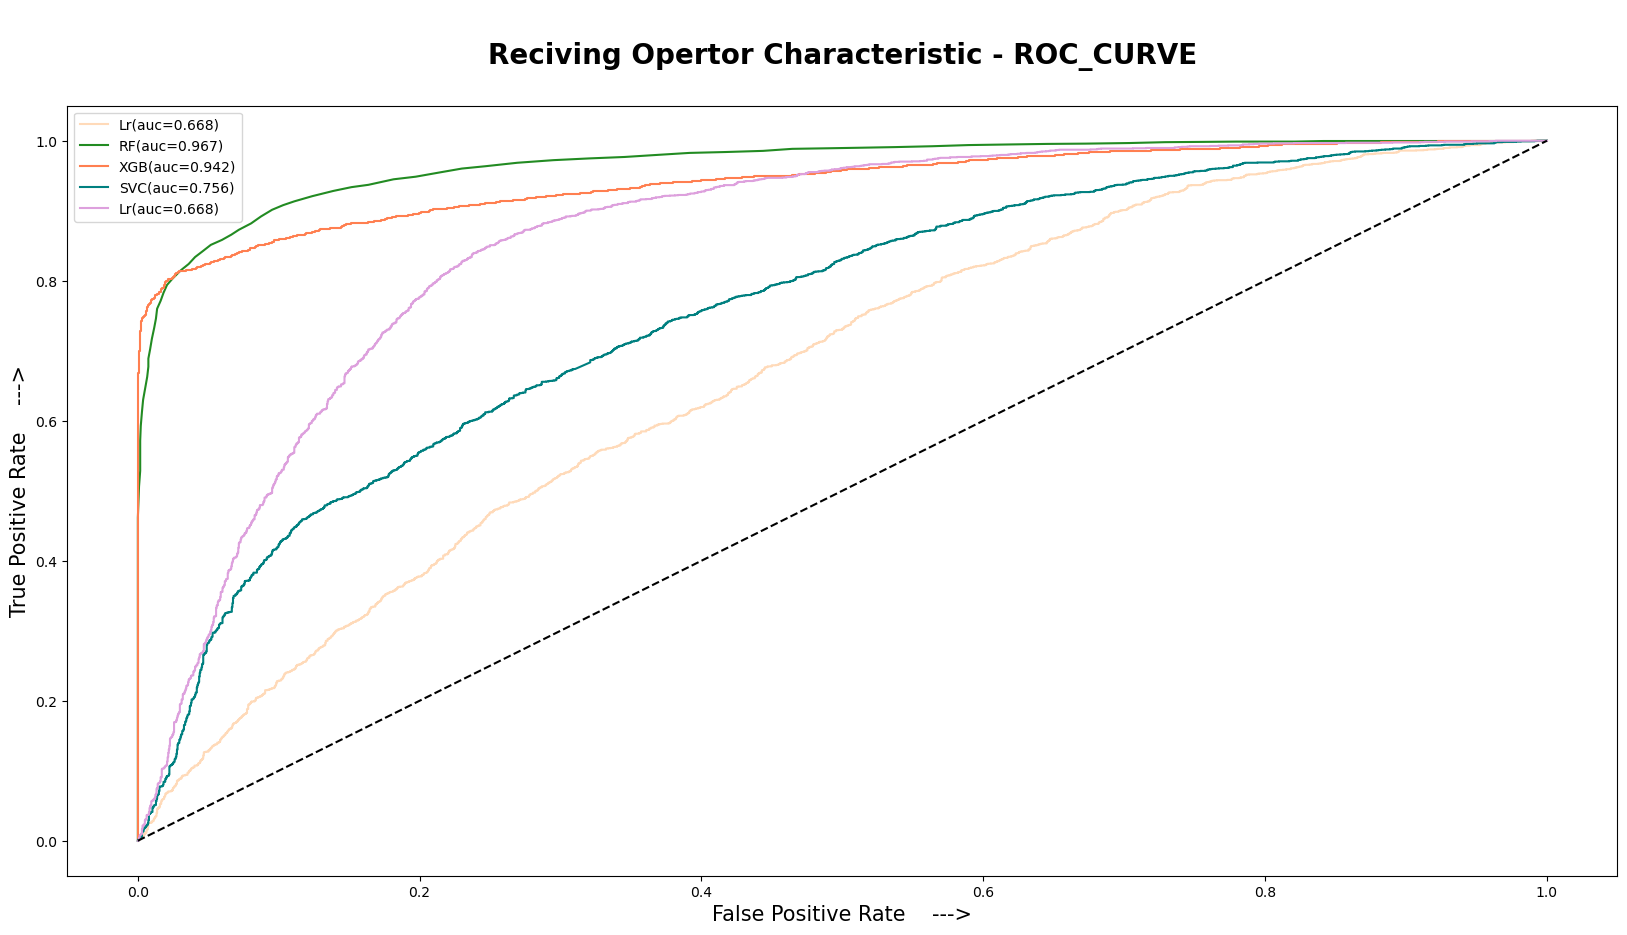

In [52]:
plt.figure(figsize=(20,10))
plt.plot(fpr_lr,tpr_lr,color='peachpuff',label="Lr(auc=%0.3f)"%auc_lr)
plt.plot(fpr_rf,tpr_rf,color='forestgreen',label="RF(auc=%0.3f)"%auc_rf)
plt.plot(fpr_xgb,tpr_xgb,color='coral',label="XGB(auc=%0.3f)"%auc_xgb)
plt.plot(fpr_svc,tpr_svc,color='teal',label="SVC(auc=%0.3f)"%auc_svc)
plt.plot(fpr_ann,tpr_ann,color='plum',label="Lr(auc=%0.3f)"%auc_lr)
plt.plot([0,1],color='k',linestyle='--')
plt.xlabel('False Positive Rate    --->',size=15)
plt.ylabel('True Positive Rate    --->',size=15)
plt.title('\nReciving Opertor Characteristic - ROC_CURVE\n',fontweight="bold",size=20)
plt.legend()
plt.show();